In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import nibabel as nib
import pickle
import skimage
from batchgenerators.augmentations.utils import pad_nd_image

from jonas_net import AlbuNet3D34

## Loading Test Data + predicted seg output

In [2]:
path_to_this_repo_folder = 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/'

def subimage(ax, data, title, alpha=1.0):
    if alpha < 1.0:
        cmap = 'hot'
    else:
        cmap = 'gray'

    ax.imshow(
        data.T, cmap=cmap,
        vmin=data.min(), vmax=data.max(),
        alpha=alpha
    )
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)
    ax.title.set_y(-0.3)
    ax.title.set_fontfamily('Times New Roman')
    ax.title.set_fontsize(10)

### BraTS18

In [ ]:
nib.load(test_data_path_18+)

In [64]:
model_folder = "brats18_3d_pretrained_2"

test_data_path_18 = f'{path_to_this_repo_folder}MICCAI_BraTS2018_ValidationData/'
# pre_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_pre_fix_segmentation_output/{model_folder}/Brats18ValidationData/'
# post_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_segmentation_output/{model_folder}/Brats18ValidationData/' 
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats18ValidationData/'

patient_list = [i for i in os.listdir(test_data_path_18) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_flair.nii.gz').get_fdata()

#     pre_fix_seg = nib.load(pre_fix_path + f"{patient_name}.nii.gz").get_fdata()
#     post_fix_seg = nib.load(post_fix_path + f"{patient_name}.nii.gz").get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
    
    fig, axs = plt.subplots(1, 5, frameon=False)
    slice_nr = 65

    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

    plt.show()

Patient name: Brats18_CBICA_AAM_1


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/segmentation_output/brats18_3d_pretrained_2/Brats18ValidationData/Brats18_CBICA_AAM_1.nii.gz'

In [ ]:
model_folder = "brats18_3d_pretrained_outputpathfix_1"
patient_name = "Brats18_CBICA_AAM_1"

test_data_path_18 = f'{path_to_this_repo_folder}MICCAI_BraTS2018_ValidationData/'
pre_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_pre_fix_segmentation_output/{model_folder}/Brats18ValidationData/'
post_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_segmentation_output/{model_folder}/Brats18ValidationData/' 
# seg_output_path = f'{path_to_this_repo_folder}testing_segmentation_output/{model_folder}/BraTS2018Validation_preprocessed/'

patient_t1 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1.nii.gz').get_fdata()
patient_t1c = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1ce.nii.gz').get_fdata()
patient_t2 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t2.nii.gz').get_fdata()
patient_flair = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_flair.nii.gz').get_fdata()

pre_fix_seg = nib.load(pre_fix_path + f"{patient_name}.nii.gz").get_fdata()
post_fix_seg = nib.load(post_fix_path + f"{patient_name}.nii.gz").get_fdata()

fig, axs = plt.subplots(1, 5, frameon=False)
slice_nr = 65

# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

# subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
subimage(axs[4], post_fix_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

# subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
# subimage(axs[5], post_fix_seg[:,:,slice_nr], '(f) Prefix-Segm.', alpha=0.8)

# plt.tight_layout()
plt.savefig('figures/example_seg.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()

### Brats20


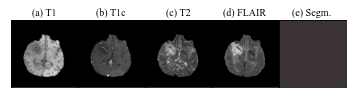

(array([ 45,  45,  46, ..., 181, 181, 181], dtype=int64),
 array([129, 129, 122, ..., 157, 157, 158], dtype=int64),
 array([ 69,  70,  58, ..., 100, 101,  94], dtype=int64))

In [4]:
model_folder = "20210309-021115_brats20_3d_pretrained_new_1_lr_0.01_epochs_60_50"
patient_number = "005"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_t1 = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t1.nii.gz').get_fdata()
patient_t1c = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t1ce.nii.gz').get_fdata()
patient_t2 = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t2.nii.gz').get_fdata()
patient_flair = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_flair.nii.gz').get_fdata()
patient_seg = nib.load(seg_output_path+ f"BraTS20_Validation_{patient_number}.nii.gz").get_fdata()
patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

slice_nr = 65

fig, axs = plt.subplots(1, 5, frameon=False)

# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

# subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

# plt.tight_layout()
plt.savefig(f'figures/Patient_{patient_number}.png', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
patient_seg.nonzero()

Patient name: BraTS20_Validation_001


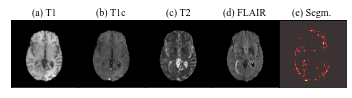

Patient name: BraTS20_Validation_002


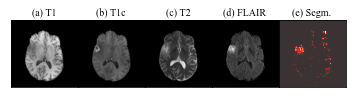

Patient name: BraTS20_Validation_003


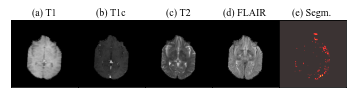

Patient name: BraTS20_Validation_004


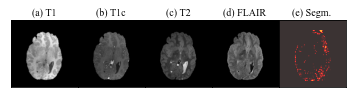

Patient name: BraTS20_Validation_005


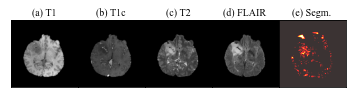

Patient name: BraTS20_Validation_006


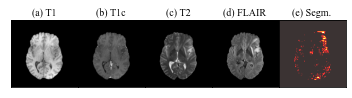

Patient name: BraTS20_Validation_007


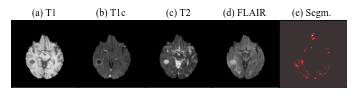

Patient name: BraTS20_Validation_008


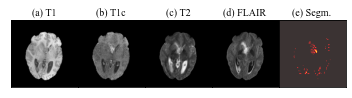

Patient name: BraTS20_Validation_009


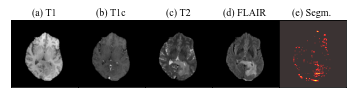

Patient name: BraTS20_Validation_010


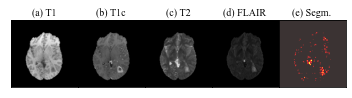

Patient name: BraTS20_Validation_011


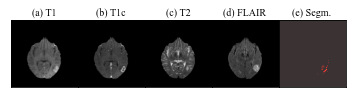

Patient name: BraTS20_Validation_012


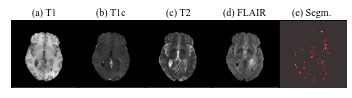

Patient name: BraTS20_Validation_013


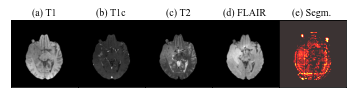

Patient name: BraTS20_Validation_014


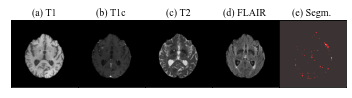

Patient name: BraTS20_Validation_015


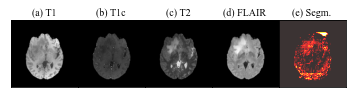

Patient name: BraTS20_Validation_016


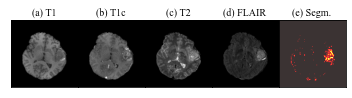

Patient name: BraTS20_Validation_017


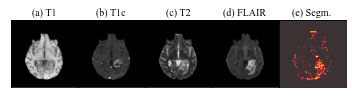

Patient name: BraTS20_Validation_018


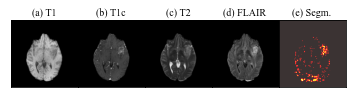

Patient name: BraTS20_Validation_019


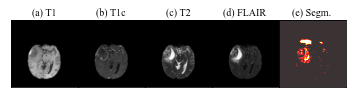

Patient name: BraTS20_Validation_020


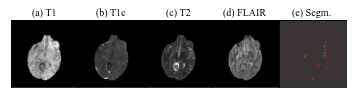

Patient name: BraTS20_Validation_021


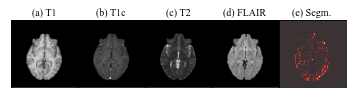

Patient name: BraTS20_Validation_022


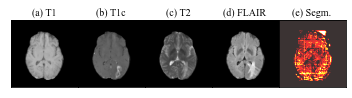

Patient name: BraTS20_Validation_023


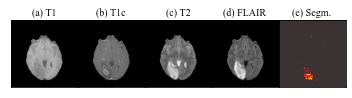

Patient name: BraTS20_Validation_024


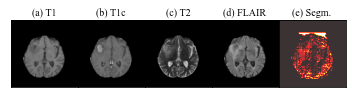

Patient name: BraTS20_Validation_025


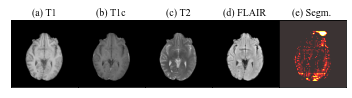

Patient name: BraTS20_Validation_026


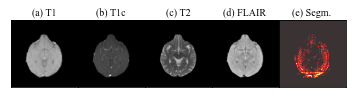

Patient name: BraTS20_Validation_027


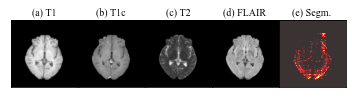

Patient name: BraTS20_Validation_028


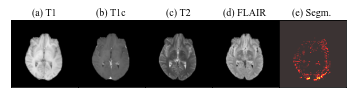

Patient name: BraTS20_Validation_029


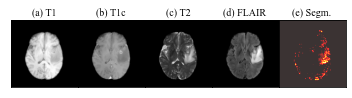

Patient name: BraTS20_Validation_030


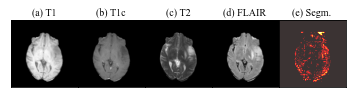

Patient name: BraTS20_Validation_031


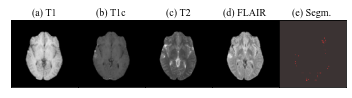

Patient name: BraTS20_Validation_032


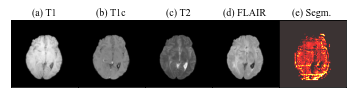

Patient name: BraTS20_Validation_033


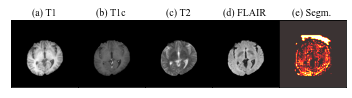

Patient name: BraTS20_Validation_034


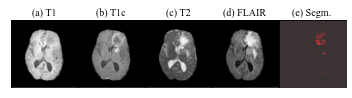

Patient name: BraTS20_Validation_035


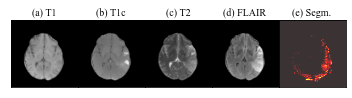

Patient name: BraTS20_Validation_036


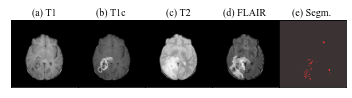

Patient name: BraTS20_Validation_037


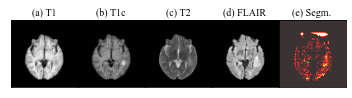

Patient name: BraTS20_Validation_038


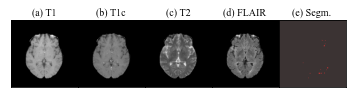

Patient name: BraTS20_Validation_039


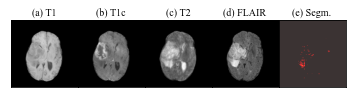

Patient name: BraTS20_Validation_040


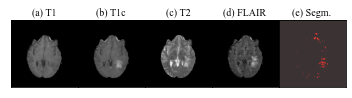

Patient name: BraTS20_Validation_041


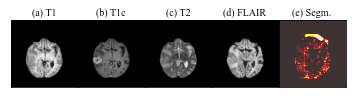

Patient name: BraTS20_Validation_042


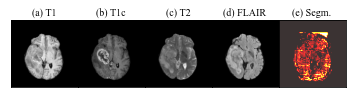

Patient name: BraTS20_Validation_043


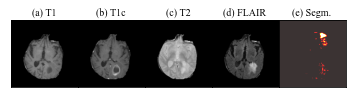

Patient name: BraTS20_Validation_044


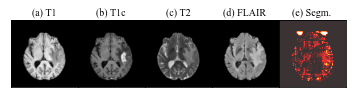

Patient name: BraTS20_Validation_045


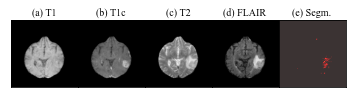

Patient name: BraTS20_Validation_046


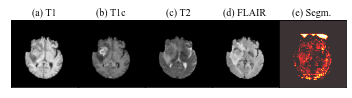

Patient name: BraTS20_Validation_047


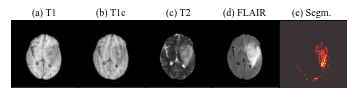

Patient name: BraTS20_Validation_048


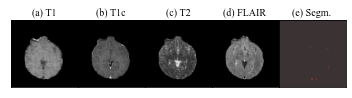

Patient name: BraTS20_Validation_049


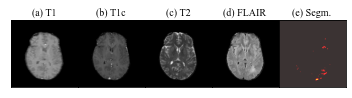

Patient name: BraTS20_Validation_050


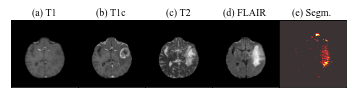

Patient name: BraTS20_Validation_051


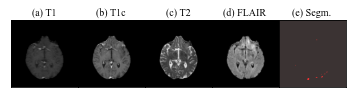

Patient name: BraTS20_Validation_052


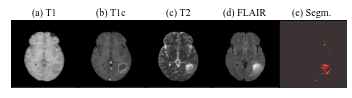

Patient name: BraTS20_Validation_053


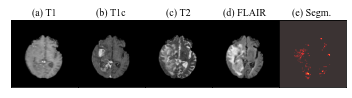

Patient name: BraTS20_Validation_054


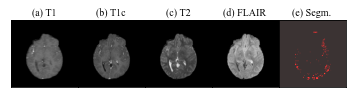

Patient name: BraTS20_Validation_055


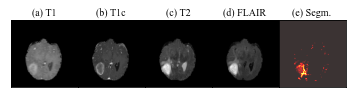

Patient name: BraTS20_Validation_056


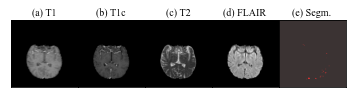

Patient name: BraTS20_Validation_057


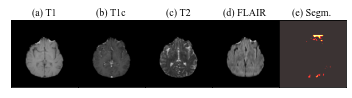

Patient name: BraTS20_Validation_058


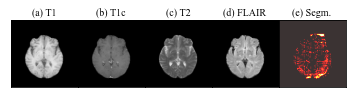

Patient name: BraTS20_Validation_059


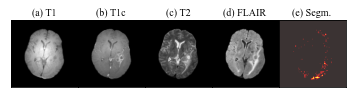

Patient name: BraTS20_Validation_060


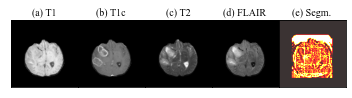

Patient name: BraTS20_Validation_061


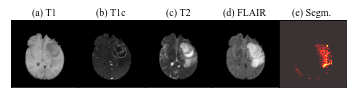

Patient name: BraTS20_Validation_062


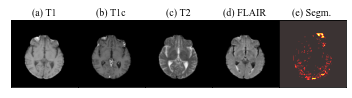

Patient name: BraTS20_Validation_063


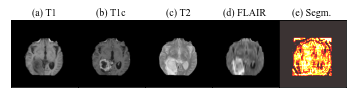

Patient name: BraTS20_Validation_064


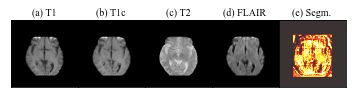

Patient name: BraTS20_Validation_065


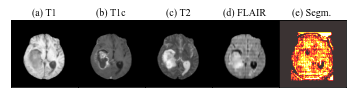

Patient name: BraTS20_Validation_066


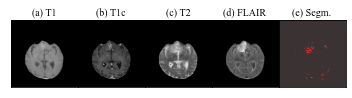

Patient name: BraTS20_Validation_067


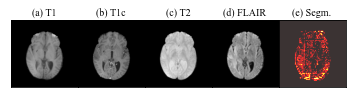

Patient name: BraTS20_Validation_068


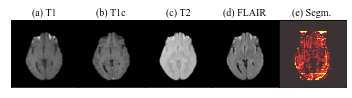

Patient name: BraTS20_Validation_069


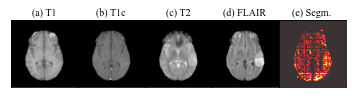

Patient name: BraTS20_Validation_070


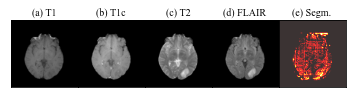

Patient name: BraTS20_Validation_071


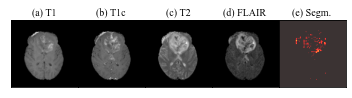

Patient name: BraTS20_Validation_072


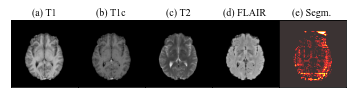

Patient name: BraTS20_Validation_073


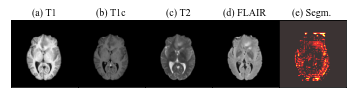

Patient name: BraTS20_Validation_074


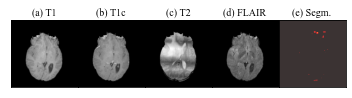

Patient name: BraTS20_Validation_075


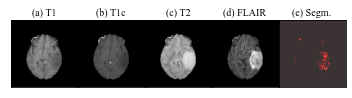

Patient name: BraTS20_Validation_076


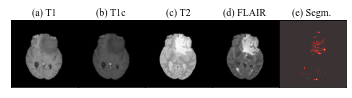

Patient name: BraTS20_Validation_077


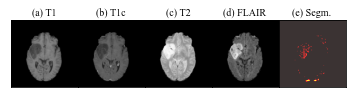

Patient name: BraTS20_Validation_078


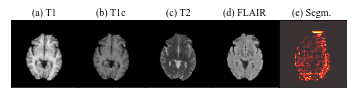

Patient name: BraTS20_Validation_079


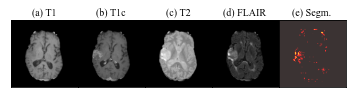

Patient name: BraTS20_Validation_080


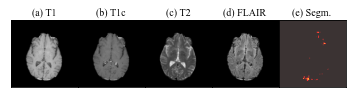

Patient name: BraTS20_Validation_081


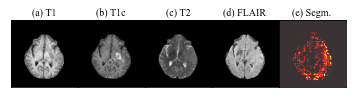

Patient name: BraTS20_Validation_082


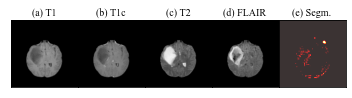

Patient name: BraTS20_Validation_083


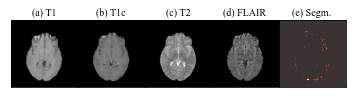

Patient name: BraTS20_Validation_084


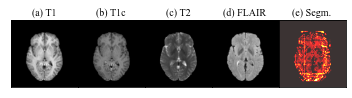

Patient name: BraTS20_Validation_085


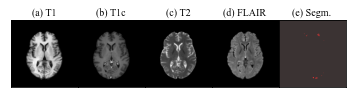

Patient name: BraTS20_Validation_086


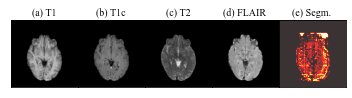

Patient name: BraTS20_Validation_087


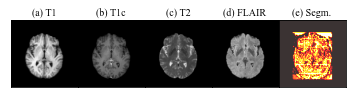

Patient name: BraTS20_Validation_088


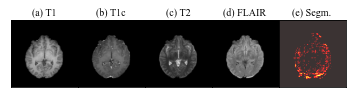

Patient name: BraTS20_Validation_089


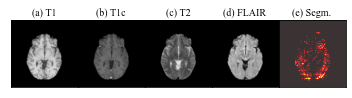

Patient name: BraTS20_Validation_090


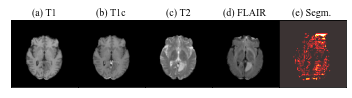

Patient name: BraTS20_Validation_091


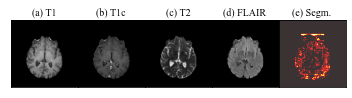

Patient name: BraTS20_Validation_092


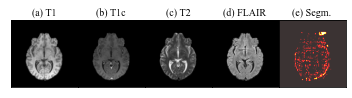

Patient name: BraTS20_Validation_093


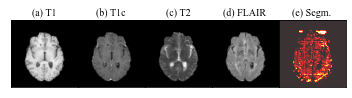

Patient name: BraTS20_Validation_094


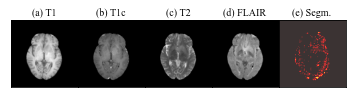

Patient name: BraTS20_Validation_095


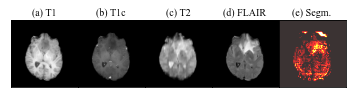

Patient name: BraTS20_Validation_096


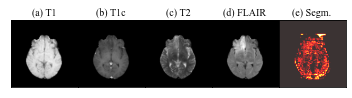

Patient name: BraTS20_Validation_097


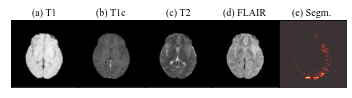

Patient name: BraTS20_Validation_098


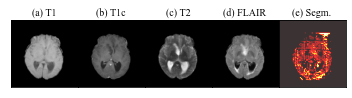

Patient name: BraTS20_Validation_099


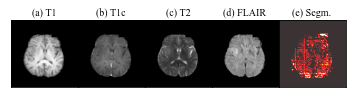

Patient name: BraTS20_Validation_100


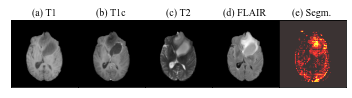

Patient name: BraTS20_Validation_101


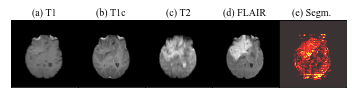

Patient name: BraTS20_Validation_102


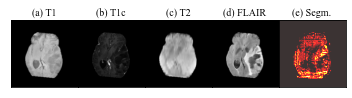

Patient name: BraTS20_Validation_103


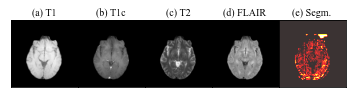

Patient name: BraTS20_Validation_104


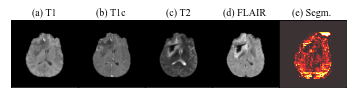

Patient name: BraTS20_Validation_105


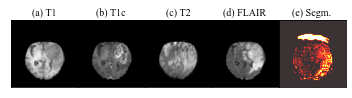

Patient name: BraTS20_Validation_106


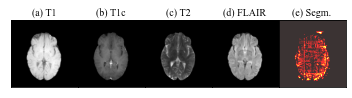

Patient name: BraTS20_Validation_107


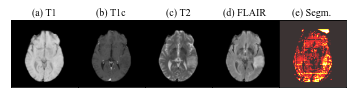

Patient name: BraTS20_Validation_108


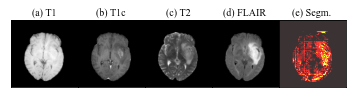

Patient name: BraTS20_Validation_109


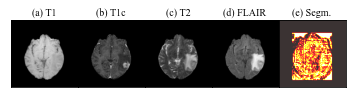

Patient name: BraTS20_Validation_110


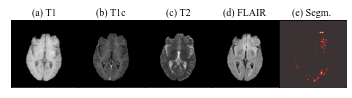

Patient name: BraTS20_Validation_111


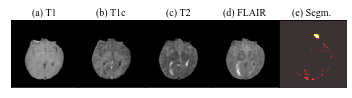

Patient name: BraTS20_Validation_112


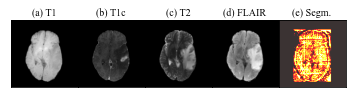

Patient name: BraTS20_Validation_113


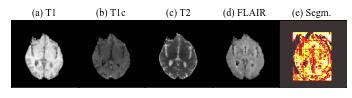

Patient name: BraTS20_Validation_114


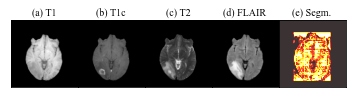

Patient name: BraTS20_Validation_115


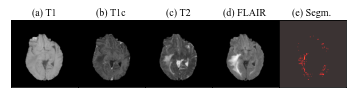

Patient name: BraTS20_Validation_116


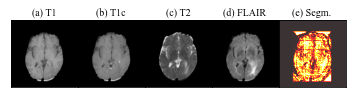

Patient name: BraTS20_Validation_117


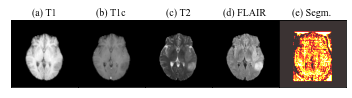

Patient name: BraTS20_Validation_118


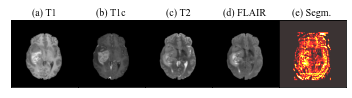

Patient name: BraTS20_Validation_119


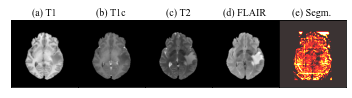

Patient name: BraTS20_Validation_120


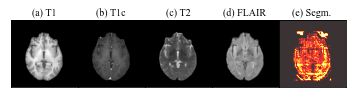

Patient name: BraTS20_Validation_121


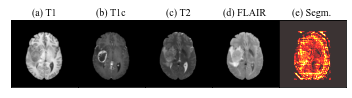

Patient name: BraTS20_Validation_122


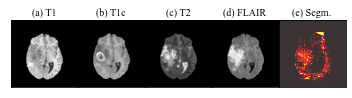

Patient name: BraTS20_Validation_123


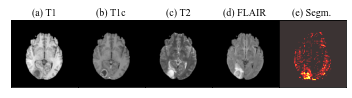

Patient name: BraTS20_Validation_124


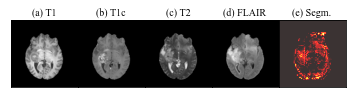

Patient name: BraTS20_Validation_125


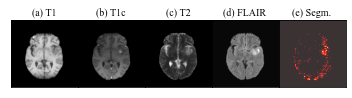

Patient name: name_mapping_validation_data.csv


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/MICCAI_BraTS2020_ValidationData/name_mapping_validation_data.csv/name_mapping_validation_data.csv_t1.nii.gz'

In [7]:
model_folder = "20210309-133958_brats20_3d_pretrained_new_lr_1_lr_0.0001_epochs_60_50"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
    
    fig, axs = plt.subplots(1, 5, frameon=False)
    slice_nr = 65
#     print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

#     subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

    plt.show()

### Overlaying training data with its segmentation labels

Patient name: BraTS20_Training_001
(array([ 51,  51,  51, ..., 143, 143, 143], dtype=int64), array([140, 140, 140, ..., 174, 175, 175], dtype=int64), array([62, 63, 64, ..., 84, 83, 84], dtype=int64))


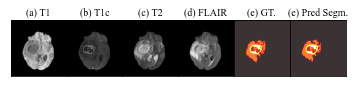

Patient name: BraTS20_Training_002
(array([ 55,  55,  56, ..., 115, 115, 115], dtype=int64), array([122, 123, 110, ..., 113, 114, 114], dtype=int64), array([72, 72, 68, ..., 47, 45, 46], dtype=int64))


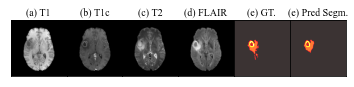

Patient name: BraTS20_Training_003
(array([125, 125, 125, ..., 180, 180, 180], dtype=int64), array([147, 147, 148, ..., 154, 155, 156], dtype=int64), array([92, 93, 92, ..., 66, 66, 66], dtype=int64))


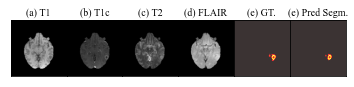

Patient name: BraTS20_Training_004
(array([125, 125, 126, ..., 180, 180, 180], dtype=int64), array([140, 141, 140, ..., 159, 159, 160], dtype=int64), array([77, 77, 77, ..., 70, 71, 72], dtype=int64))


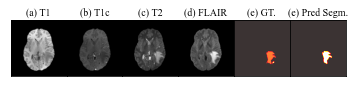

Patient name: BraTS20_Training_005
(array([117, 117, 118, ..., 175, 175, 175], dtype=int64), array([186, 187, 183, ..., 171, 171, 172], dtype=int64), array([105, 105, 105, ...,  90,  91,  94], dtype=int64))


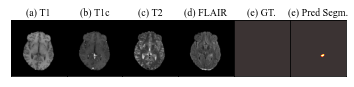

Patient name: BraTS20_Training_006
(array([104, 105, 105, ..., 176, 176, 176], dtype=int64), array([ 82,  83,  84, ..., 117, 117, 117], dtype=int64), array([84, 84, 84, ..., 93, 94, 95], dtype=int64))


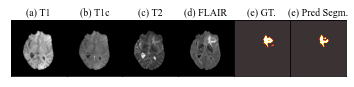

Patient name: BraTS20_Training_007
(array([140, 140, 140, ..., 185, 185, 187], dtype=int64), array([153, 153, 154, ..., 137, 137, 138], dtype=int64), array([67, 68, 66, ..., 58, 59, 57], dtype=int64))


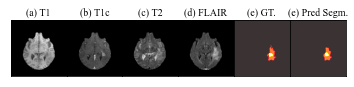

Patient name: BraTS20_Training_008
(array([ 55,  55,  55, ..., 106, 106, 106], dtype=int64), array([128, 129, 130, ..., 115, 115, 115], dtype=int64), array([42, 42, 42, ..., 53, 54, 55], dtype=int64))


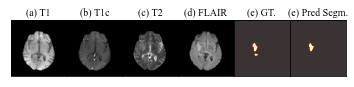

Patient name: BraTS20_Training_009
(array([ 54,  55,  55, ..., 129, 130, 149], dtype=int64), array([153, 137, 137, ..., 136, 133, 170], dtype=int64), array([64, 58, 62, ..., 89, 87, 64], dtype=int64))


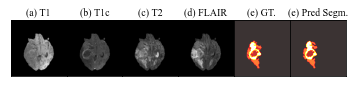

Patient name: BraTS20_Training_010
(array([ 61,  61,  62, ..., 107, 107, 108], dtype=int64), array([153, 153, 131, ..., 128, 135, 129], dtype=int64), array([83, 84, 99, ..., 89, 84, 87], dtype=int64))


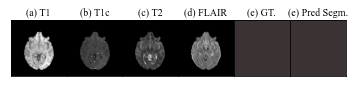

Patient name: BraTS20_Training_011
(array([132, 132, 132, ..., 190, 190, 191], dtype=int64), array([156, 156, 156, ..., 153, 154, 143], dtype=int64), array([78, 79, 80, ..., 89, 85, 88], dtype=int64))


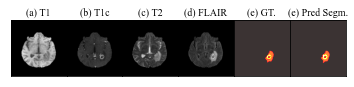

Patient name: BraTS20_Training_012
(array([147, 147, 147, ..., 185, 186, 186], dtype=int64), array([101, 104, 105, ..., 143, 130, 136], dtype=int64), array([51, 49, 51, ..., 73, 68, 65], dtype=int64))


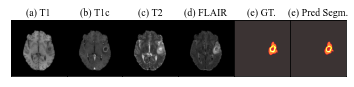

Patient name: BraTS20_Training_013
(array([ 99,  99,  99, ..., 162, 162, 162], dtype=int64), array([154, 155, 155, ..., 149, 149, 149], dtype=int64), array([86, 85, 86, ..., 68, 69, 70], dtype=int64))


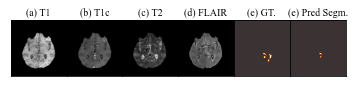

Patient name: BraTS20_Training_014
(array([ 51,  51,  52, ..., 102, 102, 102], dtype=int64), array([138, 139, 138, ..., 128, 128, 129], dtype=int64), array([55, 55, 55, ..., 71, 72, 71], dtype=int64))


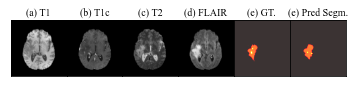

Patient name: BraTS20_Training_015
(array([124, 124, 124, ..., 180, 180, 180], dtype=int64), array([110, 111, 111, ..., 113, 113, 113], dtype=int64), array([78, 77, 78, ..., 80, 81, 82], dtype=int64))


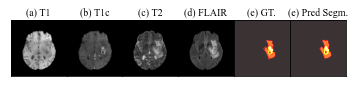

Patient name: BraTS20_Training_016
(array([ 57,  57,  57, ..., 118, 118, 118], dtype=int64), array([134, 135, 136, ..., 163, 164, 164], dtype=int64), array([ 74,  74,  74, ..., 114, 113, 114], dtype=int64))


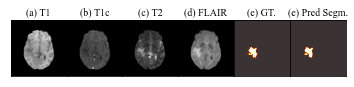

Patient name: BraTS20_Training_017
(array([129, 129, 130, ..., 188, 188, 188], dtype=int64), array([112, 113, 110, ..., 145, 146, 147], dtype=int64), array([63, 63, 63, ..., 62, 62, 62], dtype=int64))


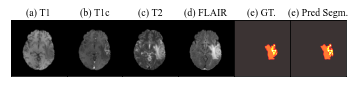

Patient name: BraTS20_Training_018
(array([ 75,  75,  75, ..., 154, 154, 154], dtype=int64), array([134, 135, 135, ..., 151, 152, 153], dtype=int64), array([70, 69, 70, ..., 55, 55, 55], dtype=int64))


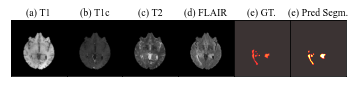

Patient name: BraTS20_Training_019
(array([131, 132, 132, ..., 182, 182, 183], dtype=int64), array([117, 108, 109, ..., 136, 137, 126], dtype=int64), array([56, 58, 57, ..., 74, 74, 74], dtype=int64))


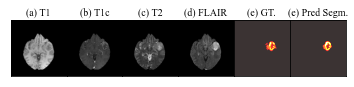

Patient name: BraTS20_Training_020
(array([ 50,  50,  50, ..., 116, 116, 116], dtype=int64), array([120, 120, 121, ...,  87, 128, 129], dtype=int64), array([49, 50, 49, ..., 73, 83, 84], dtype=int64))


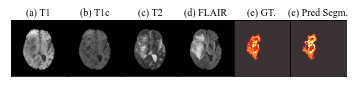

Patient name: BraTS20_Training_021
(array([ 84,  84,  84, ..., 146, 146, 146], dtype=int64), array([130, 130, 130, ..., 116, 117, 117], dtype=int64), array([103, 104, 105, ..., 105, 104, 105], dtype=int64))


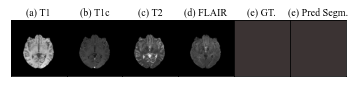

Patient name: BraTS20_Training_022
(array([ 99,  99, 100, ..., 164, 164, 164], dtype=int64), array([116, 116, 112, ..., 124, 124, 124], dtype=int64), array([ 94,  95,  94, ..., 109, 110, 111], dtype=int64))


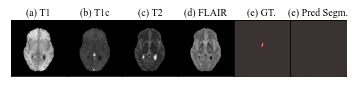

Patient name: BraTS20_Training_023
(array([ 97, 124, 125, ..., 174, 174, 174], dtype=int64), array([143, 168, 168, ..., 136, 136, 139], dtype=int64), array([ 87, 112, 114, ...,  91,  92,  87], dtype=int64))


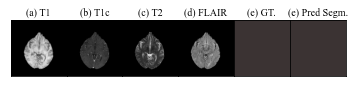

Patient name: BraTS20_Training_024
(array([125, 125, 125, ..., 183, 183, 183], dtype=int64), array([177, 177, 177, ..., 159, 159, 159], dtype=int64), array([96, 97, 98, ..., 64, 65, 66], dtype=int64))


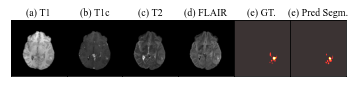

Patient name: BraTS20_Training_025
(array([ 76,  76,  76, ..., 167, 167, 167], dtype=int64), array([124, 124, 125, ..., 126, 126, 126], dtype=int64), array([104, 105, 102, ..., 104, 105, 106], dtype=int64))


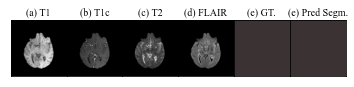

Patient name: BraTS20_Training_026
(array([ 63,  63,  63, ..., 128, 128, 128], dtype=int64), array([108, 109, 109, ..., 108, 108, 108], dtype=int64), array([61, 59, 60, ..., 51, 52, 53], dtype=int64))


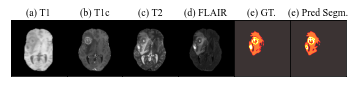

Patient name: BraTS20_Training_027
(array([115, 116, 130, ..., 182, 182, 183], dtype=int64), array([102, 103, 120, ..., 116, 117, 113], dtype=int64), array([87, 87, 66, ..., 61, 57, 56], dtype=int64))


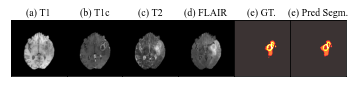

Patient name: BraTS20_Training_028
(array([134, 136, 137, ..., 173, 173, 174], dtype=int64), array([191, 189, 188, ..., 174, 175, 167], dtype=int64), array([36, 40, 40, ..., 43, 42, 43], dtype=int64))


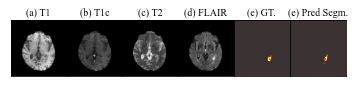

Patient name: BraTS20_Training_029
(array([ 57,  57,  57, ..., 105, 105, 106], dtype=int64), array([133, 133, 133, ..., 143, 147, 135], dtype=int64), array([68, 69, 70, ..., 92, 90, 82], dtype=int64))


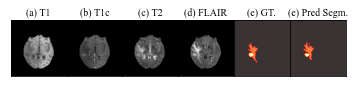

Patient name: BraTS20_Training_030
(array([ 68,  69,  69, ..., 140, 140, 140], dtype=int64), array([82, 73, 76, ..., 86, 86, 86], dtype=int64), array([72, 72, 73, ..., 83, 84, 85], dtype=int64))


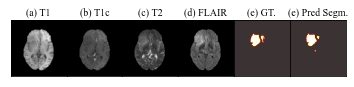

Patient name: BraTS20_Training_031
(array([100, 101, 101, ..., 163, 163, 163], dtype=int64), array([144, 142, 143, ..., 153, 153, 153], dtype=int64), array([ 89,  89,  85, ..., 110, 111, 112], dtype=int64))


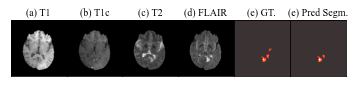

Patient name: BraTS20_Training_032
(array([119, 119, 119, ..., 150, 150, 150], dtype=int64), array([111, 112, 113, ..., 139, 139, 140], dtype=int64), array([117, 117, 117, ..., 107, 108, 106], dtype=int64))


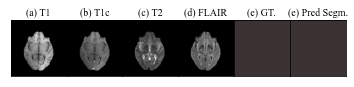

Patient name: BraTS20_Training_033
(array([ 55,  55,  55, ..., 114, 114, 114], dtype=int64), array([116, 116, 117, ..., 109, 109, 110], dtype=int64), array([ 90,  91,  90, ..., 101, 102, 102], dtype=int64))


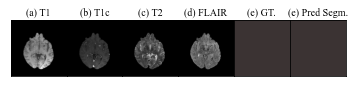

Patient name: BraTS20_Training_034
(array([115, 115, 115, ..., 164, 164, 164], dtype=int64), array([ 95,  96,  96, ..., 112, 113, 114], dtype=int64), array([ 99,  99, 103, ..., 112, 112, 112], dtype=int64))


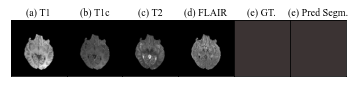

Patient name: BraTS20_Training_035
(array([ 49,  49,  49, ..., 137, 137, 137], dtype=int64), array([121, 121, 121, ..., 109, 110, 110], dtype=int64), array([53, 54, 55, ..., 69, 65, 66], dtype=int64))


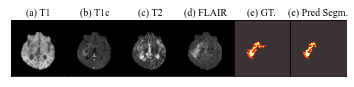

Patient name: BraTS20_Training_036
(array([143, 143, 144, ..., 184, 184, 184], dtype=int64), array([146, 147, 146, ..., 141, 142, 147], dtype=int64), array([85, 83, 85, ..., 86, 84, 89], dtype=int64))


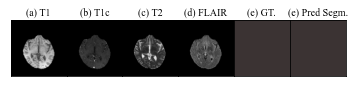

Patient name: BraTS20_Training_037
(array([ 50,  50,  50, ..., 118, 118, 118], dtype=int64), array([127, 128, 128, ..., 111, 111, 111], dtype=int64), array([66, 61, 62, ..., 67, 68, 69], dtype=int64))


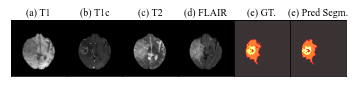

Patient name: BraTS20_Training_038
(array([ 57,  57,  57, ..., 110, 110, 110], dtype=int64), array([141, 141, 142, ..., 187, 187, 187], dtype=int64), array([64, 65, 65, ..., 73, 74, 75], dtype=int64))


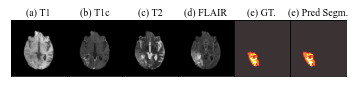

Patient name: BraTS20_Training_039
(array([121, 122, 122, ..., 177, 177, 177], dtype=int64), array([145, 145, 146, ..., 146, 146, 150], dtype=int64), array([80, 89, 89, ..., 87, 88, 74], dtype=int64))


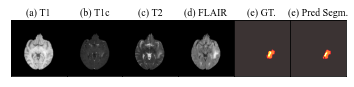

Patient name: BraTS20_Training_040
(array([ 80,  80,  80, ..., 172, 172, 173], dtype=int64), array([62, 63, 64, ..., 87, 87, 86], dtype=int64), array([51, 52, 52, ..., 60, 61, 54], dtype=int64))


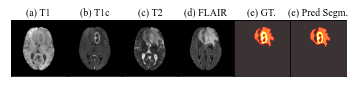

Patient name: BraTS20_Training_041
(array([ 49,  49,  49, ..., 116, 116, 116], dtype=int64), array([157, 158, 158, ..., 180, 180, 181], dtype=int64), array([51, 50, 51, ..., 50, 51, 51], dtype=int64))


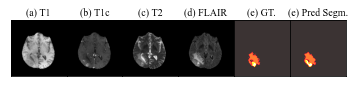

Patient name: BraTS20_Training_042
(array([116, 116, 116, ..., 166, 166, 166], dtype=int64), array([132, 134, 174, ..., 156, 157, 157], dtype=int64), array([84, 84, 94, ..., 94, 94, 95], dtype=int64))


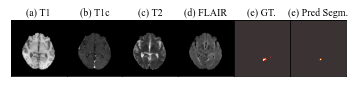

Patient name: BraTS20_Training_043
(array([ 56,  56,  56, ..., 120, 120, 121], dtype=int64), array([110, 110, 110, ..., 112, 113,  90], dtype=int64), array([59, 60, 61, ..., 66, 66, 62], dtype=int64))


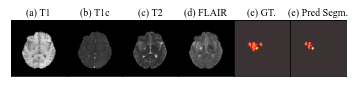

Patient name: BraTS20_Training_044
(array([ 83,  83,  83, ..., 137, 137, 137], dtype=int64), array([101, 101, 101, ...,  85,  85,  86], dtype=int64), array([109, 110, 111, ...,  84,  85,  85], dtype=int64))


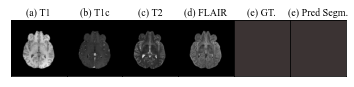

Patient name: BraTS20_Training_045
(array([ 64,  64,  65, ..., 124, 124, 124], dtype=int64), array([151, 152, 144, ..., 144, 145, 145], dtype=int64), array([73, 73, 61, ..., 84, 81, 84], dtype=int64))


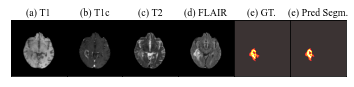

Patient name: BraTS20_Training_046
(array([119, 119, 119, ..., 165, 165, 165], dtype=int64), array([110, 111, 111, ..., 144, 145, 145], dtype=int64), array([69, 69, 70, ..., 47, 46, 47], dtype=int64))


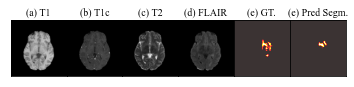

Patient name: BraTS20_Training_047
(array([ 86,  86,  86, ..., 169, 170, 170], dtype=int64), array([86, 86, 87, ..., 84, 85, 86], dtype=int64), array([88, 89, 88, ..., 75, 75, 75], dtype=int64))


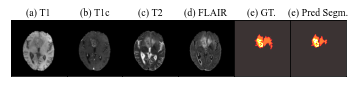

Patient name: BraTS20_Training_048
(array([129, 129, 129, ..., 181, 182, 182], dtype=int64), array([112, 113, 113, ..., 141, 133, 134], dtype=int64), array([51, 50, 51, ..., 55, 61, 62], dtype=int64))


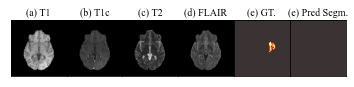

Patient name: BraTS20_Training_049
(array([116, 116, 117, ..., 167, 167, 167], dtype=int64), array([195, 196, 192, ..., 170, 171, 171], dtype=int64), array([94, 95, 94, ..., 93, 86, 89], dtype=int64))


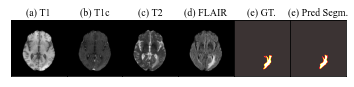

Patient name: BraTS20_Training_050
(array([ 51,  51,  51, ..., 111, 112, 112], dtype=int64), array([140, 140, 140, ..., 145, 144, 144], dtype=int64), array([68, 69, 70, ..., 90, 89, 90], dtype=int64))


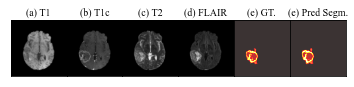

Patient name: BraTS20_Training_051
(array([ 56,  56,  56, ..., 116, 116, 116], dtype=int64), array([130, 130, 131, ..., 166, 166, 166], dtype=int64), array([ 88,  89,  88, ..., 125, 126, 127], dtype=int64))


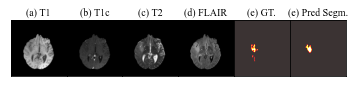

Patient name: BraTS20_Training_052
(array([ 66,  67,  70, ..., 116, 116, 116], dtype=int64), array([167, 167, 162, ..., 171, 172, 173], dtype=int64), array([108, 108, 114, ..., 104, 104, 104], dtype=int64))


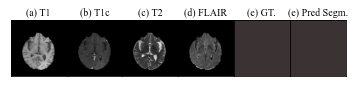

Patient name: BraTS20_Training_053
(array([ 52,  52,  52, ..., 114, 114, 115], dtype=int64), array([138, 139, 139, ..., 123, 135, 123], dtype=int64), array([98, 95, 99, ..., 83, 78, 82], dtype=int64))


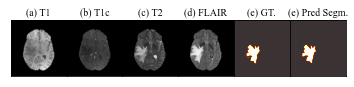

Patient name: BraTS20_Training_054
(array([ 57,  57,  57, ..., 111, 111, 111], dtype=int64), array([144, 146, 146, ..., 161, 162, 162], dtype=int64), array([63, 63, 64, ..., 82, 80, 81], dtype=int64))


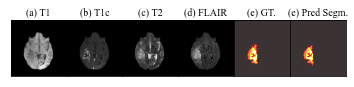

Patient name: BraTS20_Training_055
(array([126, 127, 127, ..., 189, 189, 189], dtype=int64), array([147, 144, 144, ..., 142, 143, 143], dtype=int64), array([84, 83, 84, ..., 56, 53, 54], dtype=int64))


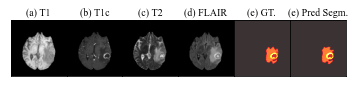

Patient name: BraTS20_Training_056
(array([ 73,  73,  73, ..., 130, 130, 130], dtype=int64), array([152, 152, 152, ..., 165, 166, 166], dtype=int64), array([93, 94, 95, ..., 85, 84, 85], dtype=int64))


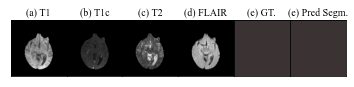

Patient name: BraTS20_Training_057
(array([117, 117, 117, ..., 167, 167, 167], dtype=int64), array([159, 160, 160, ..., 138, 138, 138], dtype=int64), array([110, 110, 111, ..., 103, 104, 105], dtype=int64))


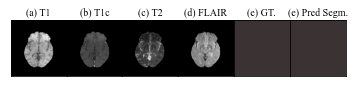

Patient name: BraTS20_Training_058
(array([117, 120, 120, ..., 186, 186, 186], dtype=int64), array([109,  97,  97, ..., 145, 145, 151], dtype=int64), array([58, 67, 68, ..., 52, 53, 56], dtype=int64))


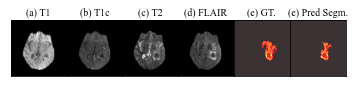

Patient name: BraTS20_Training_059
(array([120, 127, 127, ..., 171, 171, 172], dtype=int64), array([139, 118, 119, ..., 101, 102, 101], dtype=int64), array([61, 50, 50, ..., 64, 64, 64], dtype=int64))


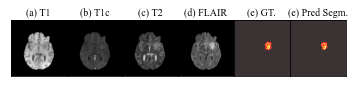

Patient name: BraTS20_Training_060
(array([132, 132, 132, ..., 179, 180, 180], dtype=int64), array([185, 185, 186, ..., 158, 149, 150], dtype=int64), array([60, 61, 58, ..., 65, 65, 65], dtype=int64))


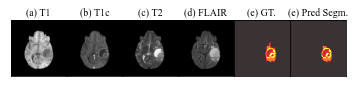

Patient name: BraTS20_Training_061
(array([ 89,  89,  89, ..., 130, 147, 148], dtype=int64), array([134, 134, 134, ...,  88, 184, 183], dtype=int64), array([73, 74, 75, ..., 65, 67, 67], dtype=int64))


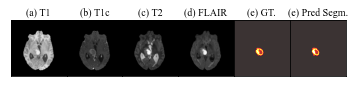

Patient name: BraTS20_Training_062
(array([ 65,  65,  65, ..., 145, 145, 145], dtype=int64), array([121, 122, 122, ..., 107, 107, 108], dtype=int64), array([ 98,  97,  99, ..., 107, 108, 105], dtype=int64))


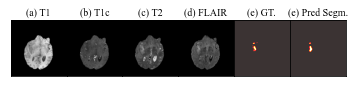

Patient name: BraTS20_Training_063
(array([118, 118, 119, ..., 145, 145, 145], dtype=int64), array([158, 159, 156, ..., 169, 169, 169], dtype=int64), array([82, 81, 86, ..., 84, 85, 86], dtype=int64))


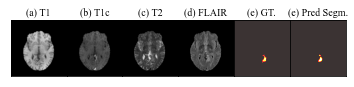

Patient name: BraTS20_Training_064
(array([ 64,  64,  64, ..., 120, 120, 121], dtype=int64), array([105, 105, 106, ..., 154, 155, 142], dtype=int64), array([54, 55, 53, ..., 69, 68, 80], dtype=int64))


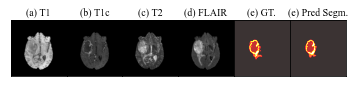

Patient name: BraTS20_Training_065
(array([120, 121, 121, ..., 185, 185, 185], dtype=int64), array([139, 140, 140, ..., 132, 132, 132], dtype=int64), array([73, 72, 73, ..., 62, 63, 64], dtype=int64))


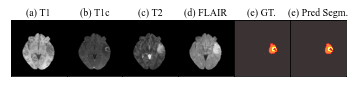

Patient name: BraTS20_Training_066
(array([ 54,  54,  55, ..., 116, 116, 116], dtype=int64), array([126, 127, 123, ..., 148, 149, 150], dtype=int64), array([ 85,  88,  78, ..., 114, 108, 108], dtype=int64))


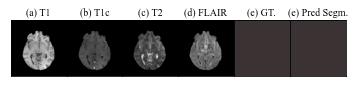

Patient name: BraTS20_Training_067
(array([113, 113, 113, ..., 176, 176, 177], dtype=int64), array([135, 135, 136, ..., 140, 141, 133], dtype=int64), array([ 85,  86,  85, ..., 103, 103,  93], dtype=int64))


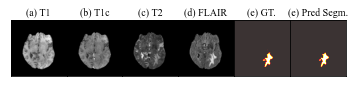

Patient name: BraTS20_Training_068
(array([101, 101, 101, ..., 163, 163, 163], dtype=int64), array([148, 149, 150, ..., 163, 163, 163], dtype=int64), array([70, 70, 70, ..., 71, 72, 73], dtype=int64))


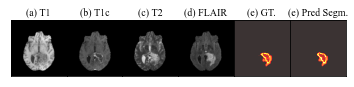

Patient name: BraTS20_Training_069
(array([ 66,  66,  66, ..., 172, 172, 172], dtype=int64), array([116, 116, 117, ..., 113, 113, 113], dtype=int64), array([87, 88, 86, ..., 94, 95, 96], dtype=int64))


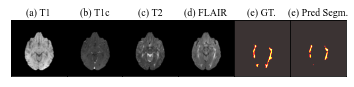

Patient name: BraTS20_Training_070
(array([ 55,  55,  55, ..., 117, 117, 117], dtype=int64), array([128, 133, 134, ..., 114, 114, 115], dtype=int64), array([ 51,  56,  56, ..., 120, 121, 120], dtype=int64))


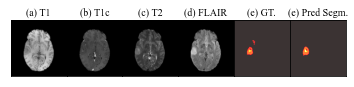

Patient name: BraTS20_Training_071
(array([ 98,  98,  98, ..., 170, 171, 171], dtype=int64), array([ 90,  91,  92, ..., 100,  97,  98], dtype=int64), array([100, 100, 100, ..., 104, 101, 102], dtype=int64))


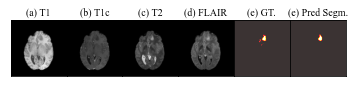

Patient name: BraTS20_Training_072
(array([116, 116, 116, ..., 181, 182, 182], dtype=int64), array([195, 195, 196, ..., 155, 152, 152], dtype=int64), array([84, 85, 84, ..., 68, 63, 68], dtype=int64))


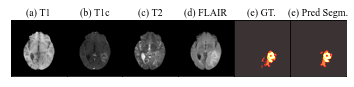

Patient name: BraTS20_Training_073
(array([128, 128, 128, ..., 179, 179, 179], dtype=int64), array([155, 155, 155, ..., 142, 143, 143], dtype=int64), array([85, 86, 87, ..., 74, 72, 73], dtype=int64))


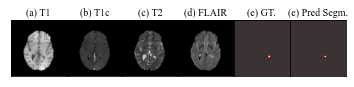

Patient name: BraTS20_Training_074
(array([117, 118, 118, ..., 170, 170, 170], dtype=int64), array([197, 173, 174, ..., 174, 174, 174], dtype=int64), array([90, 75, 74, ..., 88, 89, 90], dtype=int64))


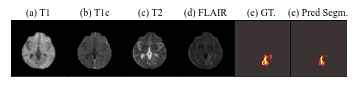

Patient name: BraTS20_Training_075
(array([104, 105, 105, ..., 174, 174, 174], dtype=int64), array([ 85,  85,  85, ..., 118, 118, 119], dtype=int64), array([76, 73, 74, ..., 72, 73, 72], dtype=int64))


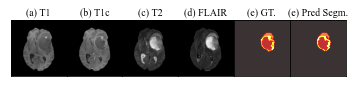

Patient name: BraTS20_Training_076
(array([ 82,  82,  82, ..., 119, 119, 119], dtype=int64), array([140, 140, 141, ..., 183, 183, 184], dtype=int64), array([65, 66, 65, ..., 97, 98, 97], dtype=int64))


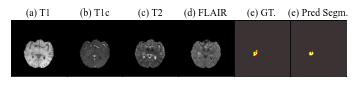

Patient name: BraTS20_Training_077
(array([133, 133, 139, ..., 183, 183, 183], dtype=int64), array([ 86,  87, 129, ..., 133, 134, 135], dtype=int64), array([88, 88, 74, ..., 58, 57, 56], dtype=int64))


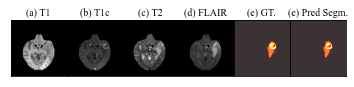

Patient name: BraTS20_Training_078
(array([ 73,  73,  73, ..., 119, 119, 119], dtype=int64), array([128, 128, 128, ..., 128, 129, 129], dtype=int64), array([46, 47, 48, ..., 73, 72, 73], dtype=int64))


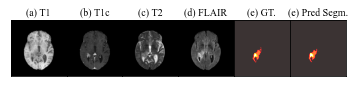

Patient name: BraTS20_Training_079
(array([ 76,  76,  76, ..., 100, 100, 100], dtype=int64), array([115, 115, 115, ..., 130, 131, 131], dtype=int64), array([114, 115, 116, ..., 114, 111, 112], dtype=int64))


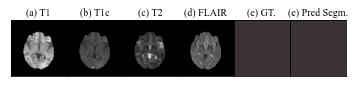

Patient name: BraTS20_Training_080
(array([ 61,  61,  61, ..., 117, 117, 117], dtype=int64), array([156, 157, 158, ..., 176, 176, 177], dtype=int64), array([46, 46, 46, ..., 74, 76, 76], dtype=int64))


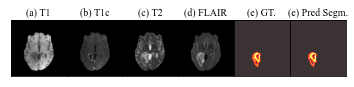

Patient name: BraTS20_Training_081
(array([136, 136, 136, ..., 179, 179, 179], dtype=int64), array([103, 103, 104, ..., 105, 105, 105], dtype=int64), array([101, 102,  99, ...,  87,  88,  89], dtype=int64))


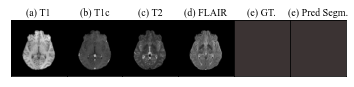

Patient name: BraTS20_Training_082
(array([ 91,  91,  91, ..., 136, 136, 137], dtype=int64), array([148, 148, 148, ..., 160, 161, 160], dtype=int64), array([75, 76, 77, ..., 75, 75, 71], dtype=int64))


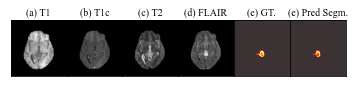

Patient name: BraTS20_Training_083
(array([124, 125, 125, ..., 183, 183, 184], dtype=int64), array([111, 110, 110, ..., 138, 138, 134], dtype=int64), array([55, 54, 55, ..., 59, 60, 65], dtype=int64))


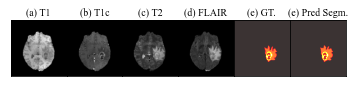

Patient name: BraTS20_Training_084
(array([ 51,  51,  51, ..., 103, 104, 104], dtype=int64), array([138, 139, 140, ..., 185, 181, 182], dtype=int64), array([54, 54, 54, ..., 70, 68, 68], dtype=int64))


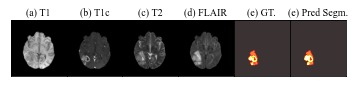

Patient name: BraTS20_Training_085
(array([117, 117, 117, ..., 146, 146, 146], dtype=int64), array([155, 156, 162, ..., 169, 169, 169], dtype=int64), array([ 98,  98, 113, ...,  88,  89,  90], dtype=int64))


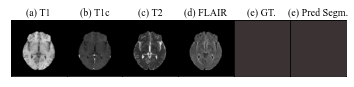

Patient name: BraTS20_Training_086
(array([50, 50, 50, ..., 83, 83, 83], dtype=int64), array([114, 115, 116, ..., 133, 133, 134], dtype=int64), array([54, 54, 54, ..., 65, 66, 67], dtype=int64))


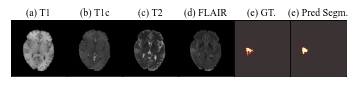

Patient name: BraTS20_Training_087
(array([146, 146, 146, ..., 186, 186, 186], dtype=int64), array([157, 158, 158, ..., 146, 147, 148], dtype=int64), array([86, 86, 87, ..., 66, 66, 66], dtype=int64))


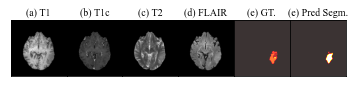

Patient name: BraTS20_Training_088
(array([ 61,  61,  61, ..., 100, 100, 100], dtype=int64), array([104, 104, 104, ..., 101, 101, 102], dtype=int64), array([ 66,  67,  68, ..., 105, 106, 104], dtype=int64))


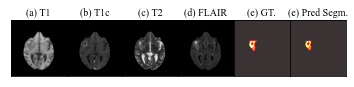

Patient name: BraTS20_Training_089
(array([ 54,  54,  54, ..., 179, 179, 179], dtype=int64), array([120, 120, 120, ..., 139, 139, 139], dtype=int64), array([48, 49, 50, ..., 56, 57, 58], dtype=int64))


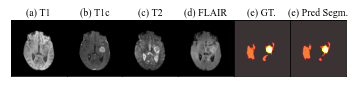

Patient name: BraTS20_Training_090
(array([ 72,  72,  73, ..., 122, 122, 122], dtype=int64), array([148, 149, 143, ..., 142, 143, 147], dtype=int64), array([76, 76, 75, ..., 74, 73, 74], dtype=int64))


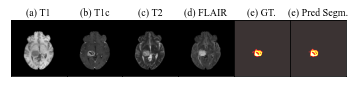

Patient name: BraTS20_Training_091
(array([ 90, 102, 102, ..., 211, 212, 212], dtype=int64), array([176, 112, 113, ..., 185, 184, 185], dtype=int64), array([ 71, 101,  97, ...,  85,  85,  85], dtype=int64))


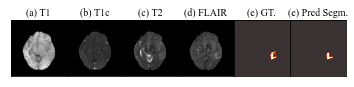

Patient name: BraTS20_Training_092
(array([ 70,  70,  70, ..., 144, 150, 151], dtype=int64), array([112, 112, 112, ..., 100,  93,  94], dtype=int64), array([108, 109, 110, ...,  84,  89,  88], dtype=int64))


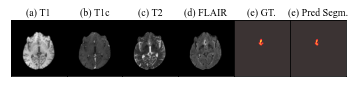

Patient name: BraTS20_Training_093
(array([ 51,  51,  51, ..., 118, 120, 120], dtype=int64), array([121, 121, 121, ..., 112, 110, 111], dtype=int64), array([61, 62, 63, ..., 64, 65, 65], dtype=int64))


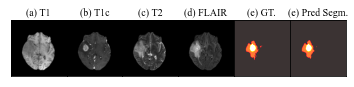

Patient name: BraTS20_Training_094
(array([122, 123, 123, ..., 180, 180, 180], dtype=int64), array([ 82,  79,  79, ..., 156, 156, 156], dtype=int64), array([88, 88, 89, ..., 52, 53, 54], dtype=int64))


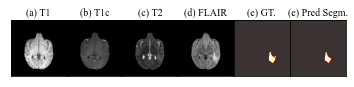

Patient name: BraTS20_Training_095
(array([ 71,  71,  71, ..., 163, 163, 163], dtype=int64), array([106, 106, 106, ...,  93,  93,  93], dtype=int64), array([90, 91, 92, ..., 85, 86, 87], dtype=int64))


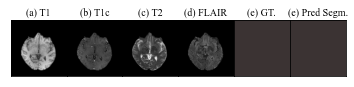

Patient name: BraTS20_Training_096
(array([ 65,  65,  65, ..., 122, 122, 122], dtype=int64), array([128, 128, 128, ..., 133, 134, 134], dtype=int64), array([70, 71, 72, ..., 91, 90, 91], dtype=int64))


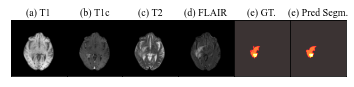

Patient name: BraTS20_Training_097
(array([ 60,  60,  60, ..., 106, 119, 119], dtype=int64), array([147, 147, 148, ..., 158, 127, 130], dtype=int64), array([71, 72, 70, ..., 92, 92, 92], dtype=int64))


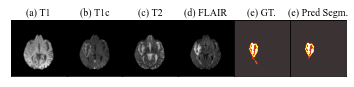

Patient name: BraTS20_Training_098
(array([ 71,  71,  71, ..., 136, 136, 136], dtype=int64), array([104, 104, 104, ...,  93,  95,  96], dtype=int64), array([104, 105, 106, ...,  98,  99,  99], dtype=int64))


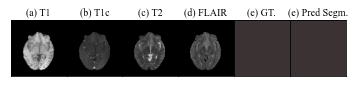

Patient name: BraTS20_Training_099
(array([130, 131, 132, ..., 165, 165, 165], dtype=int64), array([156, 156, 151, ..., 147, 147, 148], dtype=int64), array([58, 58, 57, ..., 49, 50, 48], dtype=int64))


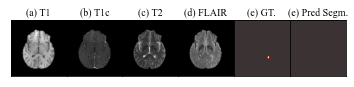

Patient name: BraTS20_Training_100
(array([ 49,  50,  50, ..., 115, 115, 115], dtype=int64), array([138, 126, 127, ..., 144, 145, 145], dtype=int64), array([72, 58, 58, ..., 90, 87, 88], dtype=int64))


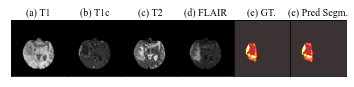

Patient name: BraTS20_Training_101
(array([121, 121, 121, ..., 180, 180, 180], dtype=int64), array([109, 110, 110, ..., 128, 128, 128], dtype=int64), array([69, 69, 70, ..., 51, 52, 53], dtype=int64))


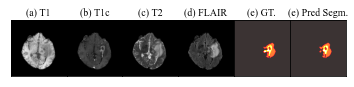

Patient name: BraTS20_Training_102
(array([119, 119, 119, ..., 151, 151, 151], dtype=int64), array([145, 145, 145, ..., 160, 160, 161], dtype=int64), array([ 99, 100, 101, ..., 104, 105,  99], dtype=int64))


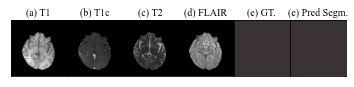

Patient name: BraTS20_Training_103
(array([ 82, 123, 123, ..., 176, 176, 176], dtype=int64), array([163, 195, 196, ..., 178, 179, 179], dtype=int64), array([58, 65, 65, ..., 57, 56, 57], dtype=int64))


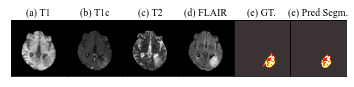

Patient name: BraTS20_Training_104
(array([ 50,  50,  50, ..., 123, 123, 123], dtype=int64), array([140, 140, 140, ..., 128, 129, 129], dtype=int64), array([61, 62, 63, ..., 67, 66, 67], dtype=int64))


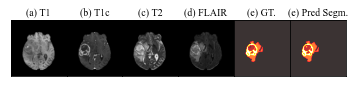

Patient name: BraTS20_Training_105
(array([ 68,  68,  68, ..., 173, 173, 173], dtype=int64), array([103, 104, 104, ..., 103, 104, 104], dtype=int64), array([53, 50, 51, ..., 68, 68, 69], dtype=int64))


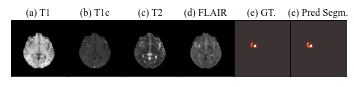

Patient name: BraTS20_Training_106
(array([ 86,  86,  86, ..., 171, 171, 171], dtype=int64), array([200, 200, 200, ..., 124, 124, 125], dtype=int64), array([44, 45, 46, ..., 87, 88, 87], dtype=int64))


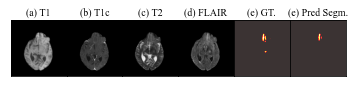

Patient name: BraTS20_Training_107
(array([113, 113, 114, ..., 167, 168, 168], dtype=int64), array([145, 145, 145, ...,  98,  97,  98], dtype=int64), array([80, 81, 79, ..., 51, 51, 51], dtype=int64))


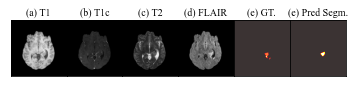

Patient name: BraTS20_Training_108
(array([ 89, 103, 103, ..., 173, 173, 173], dtype=int64), array([122,  92,  93, ..., 142, 143, 143], dtype=int64), array([49, 68, 68, ..., 40, 39, 40], dtype=int64))


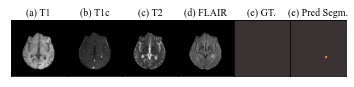

Patient name: BraTS20_Training_109
(array([118, 118, 118, ..., 177, 177, 177], dtype=int64), array([105, 105, 105, ..., 156, 157, 158], dtype=int64), array([65, 66, 67, ..., 76, 76, 76], dtype=int64))


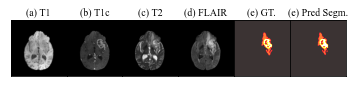

Patient name: BraTS20_Training_110
(array([119, 119, 119, ..., 161, 161, 161], dtype=int64), array([126, 127, 128, ..., 115, 115, 115], dtype=int64), array([115, 115, 115, ..., 100, 101, 102], dtype=int64))


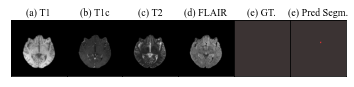

Patient name: BraTS20_Training_111
(array([ 45,  45,  45, ..., 110, 110, 111], dtype=int64), array([138, 139, 140, ..., 138, 138, 137], dtype=int64), array([63, 63, 63, ..., 65, 66, 65], dtype=int64))


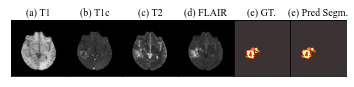

Patient name: BraTS20_Training_112
(array([ 47,  47,  47, ..., 119, 119, 119], dtype=int64), array([119, 119, 119, ..., 107, 108, 108], dtype=int64), array([55, 56, 57, ..., 64, 63, 64], dtype=int64))


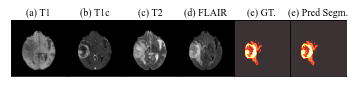

Patient name: BraTS20_Training_113
(array([ 53,  53,  53, ..., 106, 106, 141], dtype=int64), array([140, 140, 140, ..., 136, 136, 181], dtype=int64), array([74, 75, 76, ..., 79, 80, 74], dtype=int64))


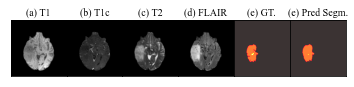

Patient name: BraTS20_Training_114
(array([ 87,  88,  88, ..., 179, 179, 179], dtype=int64), array([178, 179, 179, ..., 117, 117, 117], dtype=int64), array([60, 60, 61, ..., 64, 68, 70], dtype=int64))


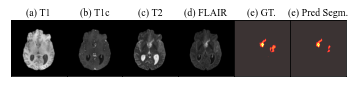

Patient name: BraTS20_Training_115
(array([ 55,  69,  69, ..., 151, 171, 171], dtype=int64), array([101, 119, 119, ..., 163, 153, 153], dtype=int64), array([129,  95,  96, ...,  73,  92,  93], dtype=int64))


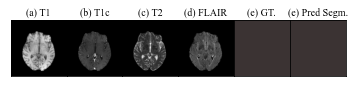

Patient name: BraTS20_Training_116
(array([ 58,  58,  58, ..., 114, 114, 114], dtype=int64), array([129, 129, 129, ..., 114, 115, 115], dtype=int64), array([63, 64, 65, ..., 65, 63, 64], dtype=int64))


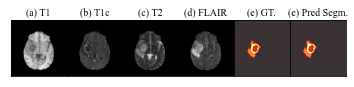

Patient name: BraTS20_Training_117
(array([100, 100, 100, ..., 180, 180, 180], dtype=int64), array([138, 138, 138, ..., 147, 147, 147], dtype=int64), array([65, 66, 67, ..., 68, 69, 70], dtype=int64))


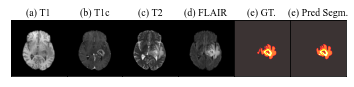

Patient name: BraTS20_Training_118
(array([55, 55, 55, ..., 99, 99, 99], dtype=int64), array([109, 109, 109, ..., 127, 127, 127], dtype=int64), array([60, 61, 62, ..., 64, 65, 66], dtype=int64))


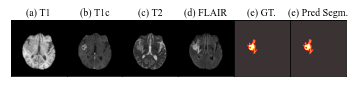

Patient name: BraTS20_Training_119
(array([130, 130, 130, ..., 185, 185, 185], dtype=int64), array([111, 111, 112, ..., 150, 150, 150], dtype=int64), array([47, 48, 47, ..., 57, 60, 61], dtype=int64))


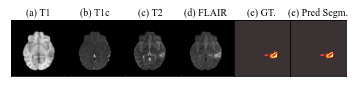

Patient name: BraTS20_Training_120
(array([ 92,  92,  92, ..., 156, 156, 156], dtype=int64), array([108, 108, 108, ..., 127, 127, 127], dtype=int64), array([103, 104, 105, ..., 102, 103, 104], dtype=int64))


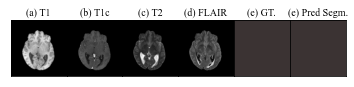

Patient name: BraTS20_Training_121
(array([109, 109, 109, ..., 178, 178, 178], dtype=int64), array([ 87,  88,  88, ..., 118, 118, 118], dtype=int64), array([87, 86, 87, ..., 93, 94, 95], dtype=int64))


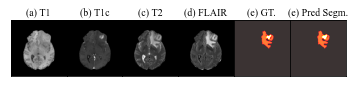

Patient name: BraTS20_Training_122
(array([151, 151, 151, ..., 185, 185, 185], dtype=int64), array([128, 128, 128, ..., 144, 144, 144], dtype=int64), array([86, 87, 88, ..., 83, 84, 85], dtype=int64))


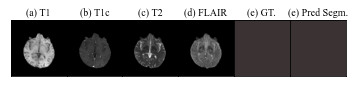

Patient name: BraTS20_Training_123
(array([108, 108, 108, ..., 186, 186, 186], dtype=int64), array([145, 145, 146, ..., 147, 147, 147], dtype=int64), array([79, 80, 78, ..., 65, 66, 67], dtype=int64))


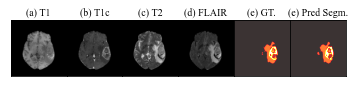

Patient name: BraTS20_Training_124
(array([ 55,  55,  55, ..., 128, 128, 128], dtype=int64), array([132, 132, 133, ..., 131, 132, 132], dtype=int64), array([64, 65, 64, ..., 70, 68, 69], dtype=int64))


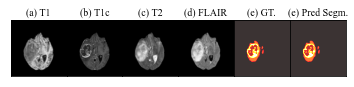

Patient name: BraTS20_Training_125
(array([ 63,  63,  63, ..., 124, 124, 124], dtype=int64), array([121, 121, 121, ..., 132, 133, 133], dtype=int64), array([93, 94, 95, ..., 85, 84, 85], dtype=int64))


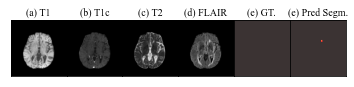

Patient name: BraTS20_Training_126
(array([58, 58, 58, ..., 96, 96, 96], dtype=int64), array([125, 126, 127, ..., 122, 123, 123], dtype=int64), array([82, 82, 82, ..., 93, 91, 92], dtype=int64))


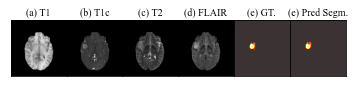

Patient name: BraTS20_Training_127
(array([139, 139, 139, ..., 183, 183, 183], dtype=int64), array([152, 152, 152, ..., 163, 163, 163], dtype=int64), array([74, 75, 76, ..., 65, 66, 67], dtype=int64))


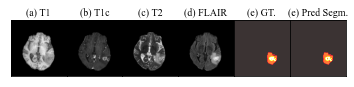

Patient name: BraTS20_Training_128
(array([139, 139, 139, ..., 177, 177, 177], dtype=int64), array([100, 100, 101, ..., 104, 109, 109], dtype=int64), array([72, 73, 72, ..., 92, 87, 88], dtype=int64))


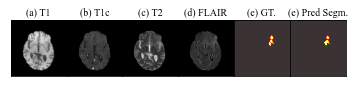

Patient name: BraTS20_Training_129
(array([ 59,  59,  59, ..., 113, 113, 113], dtype=int64), array([161, 161, 161, ..., 189, 189, 189], dtype=int64), array([62, 63, 64, ..., 73, 74, 75], dtype=int64))


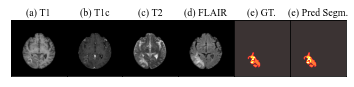

Patient name: BraTS20_Training_130
(array([ 57,  57,  57, ..., 111, 111, 111], dtype=int64), array([123, 124, 124, ..., 122, 123, 124], dtype=int64), array([52, 52, 54, ..., 71, 71, 71], dtype=int64))


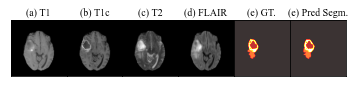

Patient name: BraTS20_Training_131
(array([117, 117, 117, ..., 163, 163, 163], dtype=int64), array([184, 185, 185, ..., 172, 172, 173], dtype=int64), array([ 93,  91,  92, ..., 108, 112, 108], dtype=int64))


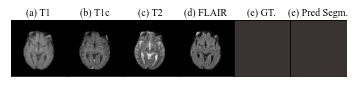

Patient name: BraTS20_Training_132
(array([ 59,  59,  60, ..., 157, 157, 157], dtype=int64), array([158, 159, 155, ..., 154, 155, 156], dtype=int64), array([88, 88, 88, ..., 84, 84, 85], dtype=int64))


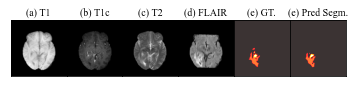

Patient name: BraTS20_Training_133
(array([118, 119, 119, ..., 180, 180, 180], dtype=int64), array([120, 118, 118, ..., 131, 131, 132], dtype=int64), array([104, 102, 104, ...,  82,  84,  83], dtype=int64))


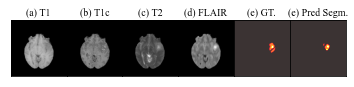

Patient name: BraTS20_Training_134
(array([ 53,  54,  54, ..., 113, 113, 113], dtype=int64), array([149, 129, 130, ..., 187, 188, 188], dtype=int64), array([ 71,  93,  93, ..., 108, 107, 108], dtype=int64))


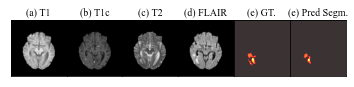

Patient name: BraTS20_Training_135
(array([ 98,  98,  98, ..., 176, 176, 176], dtype=int64), array([105, 106, 106, ..., 117, 117, 118], dtype=int64), array([ 84,  83,  84, ...,  88, 100, 100], dtype=int64))


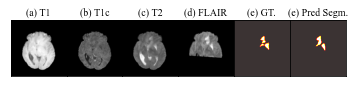

Patient name: BraTS20_Training_136
(array([ 80,  81,  81, ..., 142, 142, 142], dtype=int64), array([151, 149, 150, ..., 163, 163, 164], dtype=int64), array([ 81,  81,  81, ..., 100, 101,  97], dtype=int64))


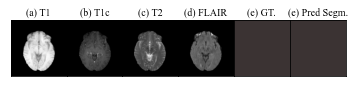

Patient name: BraTS20_Training_137
(array([ 51,  51,  51, ..., 124, 124, 124], dtype=int64), array([141, 141, 142, ..., 126, 127, 128], dtype=int64), array([50, 51, 53, ..., 89, 89, 89], dtype=int64))


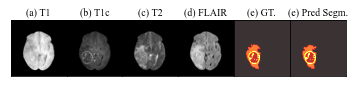

Patient name: BraTS20_Training_138
(array([ 64,  64,  65, ..., 142, 142, 143], dtype=int64), array([118, 119, 113, ...,  98,  98,  92], dtype=int64), array([96, 96, 89, ..., 79, 90, 82], dtype=int64))


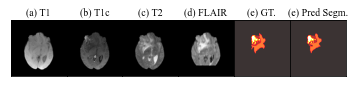

Patient name: BraTS20_Training_139
(array([133, 133, 134, ..., 174, 174, 175], dtype=int64), array([173, 173, 171, ..., 171, 172, 171], dtype=int64), array([85, 86, 88, ..., 79, 79, 82], dtype=int64))


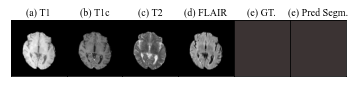

Patient name: BraTS20_Training_140
(array([108, 108, 108, ..., 171, 171, 171], dtype=int64), array([113, 118, 118, ..., 145, 146, 146], dtype=int64), array([ 89,  90,  92, ..., 112, 110, 111], dtype=int64))


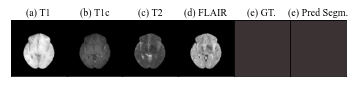

Patient name: BraTS20_Training_141
(array([140, 141, 141, ..., 174, 174, 174], dtype=int64), array([110, 105, 105, ..., 121, 121, 122], dtype=int64), array([ 99, 102, 103, ..., 105, 106, 105], dtype=int64))


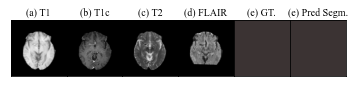

Patient name: BraTS20_Training_142
(array([ 78,  78,  78, ..., 106, 106, 106], dtype=int64), array([139, 139, 139, ..., 140, 143, 144], dtype=int64), array([103, 104, 105, ..., 106, 108, 108], dtype=int64))


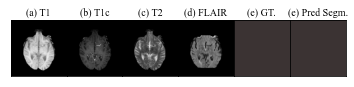

Patient name: BraTS20_Training_143
(array([108, 108, 108, ..., 178, 178, 178], dtype=int64), array([ 82,  83,  84, ..., 107, 108, 109], dtype=int64), array([84, 84, 84, ..., 77, 77, 77], dtype=int64))


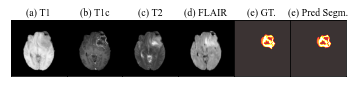

Patient name: BraTS20_Training_144
(array([ 81,  81,  81, ..., 173, 173, 173], dtype=int64), array([ 77,  77,  78, ..., 110, 111, 111], dtype=int64), array([80, 81, 80, ..., 99, 97, 98], dtype=int64))


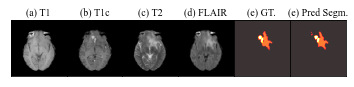

Patient name: BraTS20_Training_145
(array([133, 133, 133, ..., 187, 187, 188], dtype=int64), array([119, 120, 121, ..., 130, 130, 126], dtype=int64), array([69, 69, 70, ..., 57, 59, 50], dtype=int64))


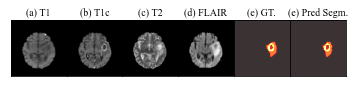

Patient name: BraTS20_Training_146
(array([ 52,  52,  52, ..., 118, 118, 118], dtype=int64), array([128, 129, 130, ..., 116, 117, 118], dtype=int64), array([53, 53, 53, ..., 73, 73, 73], dtype=int64))


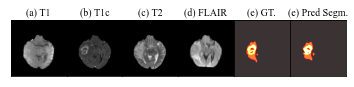

Patient name: BraTS20_Training_147
(array([115, 115, 115, ..., 174, 174, 174], dtype=int64), array([112, 113, 114, ..., 129, 129, 130], dtype=int64), array([76, 76, 76, ..., 63, 65, 62], dtype=int64))


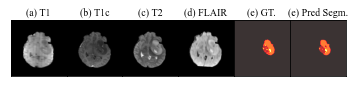

Patient name: BraTS20_Training_148
(array([119, 119, 119, ..., 187, 187, 187], dtype=int64), array([ 68,  69,  69, ..., 153, 153, 154], dtype=int64), array([103, 102, 104, ...,  61,  63,  61], dtype=int64))


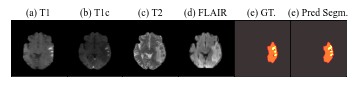

Patient name: BraTS20_Training_149
(array([113, 113, 113, ..., 193, 193, 193], dtype=int64), array([118, 118, 119, ..., 132, 133, 140], dtype=int64), array([76, 77, 73, ..., 61, 61, 60], dtype=int64))


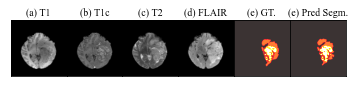

Patient name: BraTS20_Training_150
(array([106, 106, 106, ..., 177, 177, 177], dtype=int64), array([105, 105, 106, ..., 140, 141, 141], dtype=int64), array([74, 75, 73, ..., 90, 86, 87], dtype=int64))


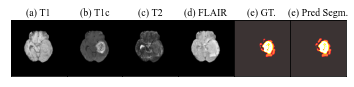

Patient name: BraTS20_Training_151
(array([107, 107, 107, ..., 177, 177, 177], dtype=int64), array([ 94,  94,  94, ..., 112, 112, 112], dtype=int64), array([82, 83, 84, ..., 79, 80, 81], dtype=int64))


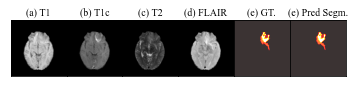

Patient name: BraTS20_Training_152
(array([ 62,  62,  62, ..., 145, 145, 145], dtype=int64), array([101, 101, 101, ..., 109, 109, 109], dtype=int64), array([82, 83, 84, ..., 93, 94, 95], dtype=int64))


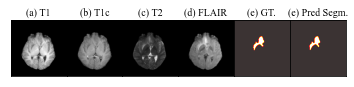

Patient name: BraTS20_Training_153
(array([129, 129, 129, ..., 184, 184, 184], dtype=int64), array([134, 134, 135, ..., 162, 162, 162], dtype=int64), array([87, 88, 87, ..., 92, 93, 94], dtype=int64))


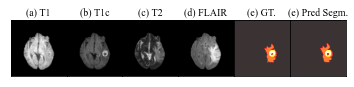

Patient name: BraTS20_Training_154
(array([ 66,  66,  66, ..., 119, 119, 119], dtype=int64), array([108, 109, 109, ..., 112, 113, 113], dtype=int64), array([ 99,  98,  99, ..., 113, 111, 112], dtype=int64))


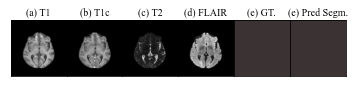

Patient name: BraTS20_Training_155
(array([120, 120, 120, ..., 174, 174, 174], dtype=int64), array([133, 133, 134, ..., 164, 164, 165], dtype=int64), array([91, 92, 89, ..., 60, 61, 61], dtype=int64))


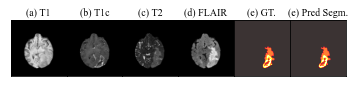

Patient name: BraTS20_Training_156
(array([121, 121, 121, ..., 176, 176, 177], dtype=int64), array([112, 112, 112, ..., 144, 144, 137], dtype=int64), array([67, 68, 69, ..., 66, 67, 67], dtype=int64))


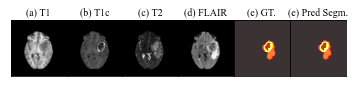

Patient name: BraTS20_Training_157
(array([ 67,  67,  67, ..., 130, 130, 130], dtype=int64), array([ 93,  93,  93, ..., 118, 118, 119], dtype=int64), array([ 91,  92,  93, ..., 108, 109, 108], dtype=int64))


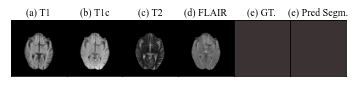

Patient name: BraTS20_Training_158
(array([131, 131, 131, ..., 188, 188, 188], dtype=int64), array([111, 112, 112, ..., 128, 128, 128], dtype=int64), array([50, 47, 48, ..., 51, 52, 53], dtype=int64))


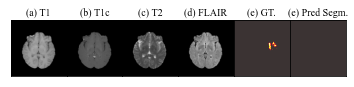

Patient name: BraTS20_Training_159
(array([ 62,  62,  62, ..., 104, 104, 105], dtype=int64), array([141, 142, 143, ..., 142, 143, 140], dtype=int64), array([96, 96, 95, ..., 92, 92, 92], dtype=int64))


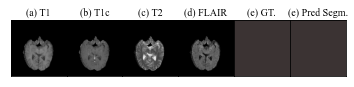

Patient name: BraTS20_Training_160
(array([102, 102, 102, ..., 159, 159, 159], dtype=int64), array([118, 119, 142, ..., 143, 143, 143], dtype=int64), array([86, 85, 66, ..., 71, 72, 73], dtype=int64))


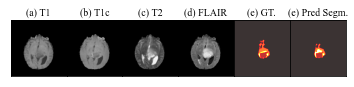

Patient name: BraTS20_Training_161
(array([ 73,  73,  74, ..., 124, 124, 124], dtype=int64), array([ 98,  98,  96, ..., 106, 107, 108], dtype=int64), array([90, 91, 89, ..., 82, 82, 82], dtype=int64))


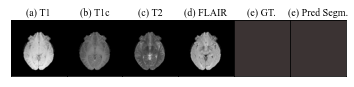

Patient name: BraTS20_Training_162
(array([ 76,  76,  76, ..., 148, 148, 148], dtype=int64), array([149, 149, 149, ..., 148, 148, 149], dtype=int64), array([54, 55, 56, ..., 84, 85, 84], dtype=int64))


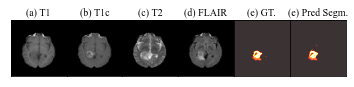

Patient name: BraTS20_Training_163
(array([107, 107, 108, ..., 178, 178, 178], dtype=int64), array([100, 100,  99, ..., 112, 113, 114], dtype=int64), array([84, 85, 83, ..., 86, 86, 86], dtype=int64))


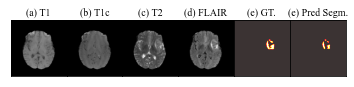

Patient name: BraTS20_Training_164
(array([ 54,  54,  54, ..., 123, 123, 124], dtype=int64), array([138, 139, 139, ..., 151, 151, 150], dtype=int64), array([92, 89, 90, ..., 82, 83, 80], dtype=int64))


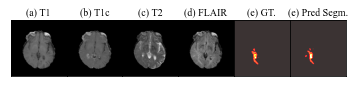

Patient name: BraTS20_Training_165
(array([ 85,  85,  85, ..., 180, 180, 180], dtype=int64), array([160, 161, 161, ..., 150, 150, 154], dtype=int64), array([67, 66, 67, ..., 73, 74, 74], dtype=int64))


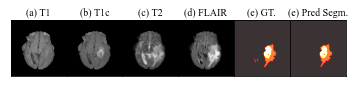

Patient name: BraTS20_Training_166
(array([ 52,  52,  52, ..., 124, 124, 124], dtype=int64), array([131, 131, 131, ..., 103, 103, 104], dtype=int64), array([61, 62, 63, ..., 65, 66, 66], dtype=int64))


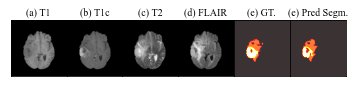

Patient name: BraTS20_Training_167
(array([108, 111, 112, ..., 173, 173, 173], dtype=int64), array([110, 122, 118, ..., 118, 118, 119], dtype=int64), array([62, 67, 64, ..., 73, 74, 75], dtype=int64))


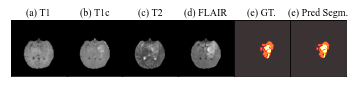

Patient name: BraTS20_Training_168
(array([ 54,  54,  55, ..., 116, 116, 116], dtype=int64), array([147, 147, 146, ..., 141, 141, 141], dtype=int64), array([68, 69, 68, ..., 90, 91, 92], dtype=int64))


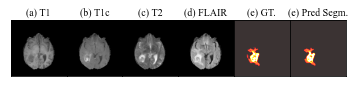

Patient name: BraTS20_Training_169
(array([132, 132, 132, ..., 178, 179, 184], dtype=int64), array([141, 142, 143, ..., 150, 147, 144], dtype=int64), array([55, 55, 55, ..., 58, 56, 65], dtype=int64))


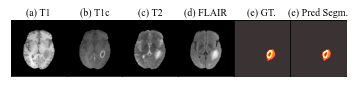

Patient name: BraTS20_Training_170
(array([135, 135, 135, ..., 186, 186, 186], dtype=int64), array([147, 148, 148, ..., 133, 133, 134], dtype=int64), array([48, 46, 47, ..., 51, 52, 51], dtype=int64))


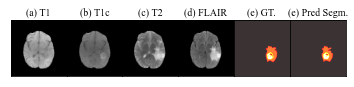

Patient name: BraTS20_Training_171
(array([ 67,  67,  67, ..., 138, 138, 139], dtype=int64), array([ 97,  98,  99, ..., 105, 105, 104], dtype=int64), array([86, 89, 89, ..., 97, 98, 96], dtype=int64))


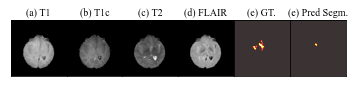

Patient name: BraTS20_Training_172
(array([120, 121, 121, ..., 154, 154, 154], dtype=int64), array([131, 127, 127, ..., 112, 113, 113], dtype=int64), array([80, 79, 80, ..., 69, 67, 68], dtype=int64))


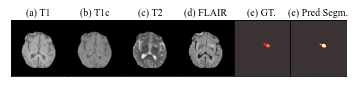

Patient name: BraTS20_Training_173
(array([124, 124, 124, ..., 183, 183, 183], dtype=int64), array([173, 173, 173, ..., 143, 143, 144], dtype=int64), array([121, 122, 123, ...,  76,  77,  76], dtype=int64))


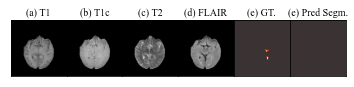

Patient name: BraTS20_Training_174
(array([122, 122, 122, ..., 173, 173, 173], dtype=int64), array([110, 110, 110, ..., 128, 128, 128], dtype=int64), array([97, 98, 99, ..., 84, 85, 86], dtype=int64))


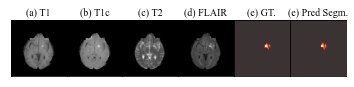

Patient name: BraTS20_Training_175
(array([ 77,  77,  77, ..., 173, 173, 173], dtype=int64), array([ 89,  89,  89, ..., 108, 108, 108], dtype=int64), array([87, 88, 89, ..., 70, 71, 72], dtype=int64))


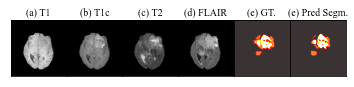

Patient name: BraTS20_Training_176
(array([ 61,  61,  61, ..., 117, 117, 117], dtype=int64), array([131, 131, 131, ..., 125, 125, 125], dtype=int64), array([ 96,  97,  98, ..., 111, 112, 113], dtype=int64))


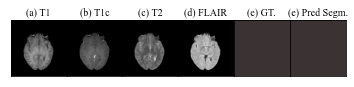

Patient name: BraTS20_Training_177
(array([ 79,  79,  79, ..., 111, 111, 111], dtype=int64), array([151, 151, 151, ..., 148, 148, 148], dtype=int64), array([56, 57, 58, ..., 56, 57, 58], dtype=int64))


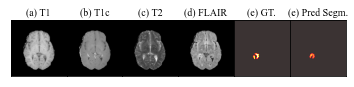

Patient name: BraTS20_Training_178
(array([ 61,  61,  61, ..., 128, 129, 129], dtype=int64), array([145, 145, 145, ..., 147, 145, 147], dtype=int64), array([87, 88, 89, ..., 30, 25, 27], dtype=int64))


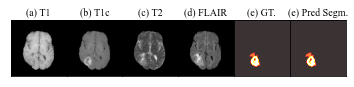

Patient name: BraTS20_Training_179
(array([136, 136, 136, ..., 183, 183, 183], dtype=int64), array([151, 151, 152, ..., 131, 132, 133], dtype=int64), array([84, 85, 78, ..., 63, 63, 61], dtype=int64))


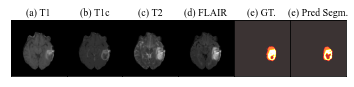

Patient name: BraTS20_Training_180
(array([ 51,  51,  51, ..., 128, 128, 128], dtype=int64), array([138, 138, 139, ..., 113, 114, 115], dtype=int64), array([55, 56, 55, ..., 59, 59, 59], dtype=int64))


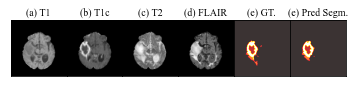

Patient name: BraTS20_Training_181
(array([119, 119, 119, ..., 168, 168, 168], dtype=int64), array([178, 182, 182, ..., 180, 180, 180], dtype=int64), array([75, 84, 85, ..., 66, 67, 68], dtype=int64))


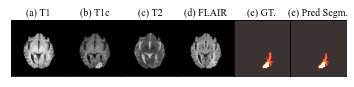

Patient name: BraTS20_Training_182
(array([126, 126, 126, ..., 171, 171, 171], dtype=int64), array([111, 111, 112, ..., 121, 121, 122], dtype=int64), array([97, 98, 94, ..., 90, 91, 89], dtype=int64))


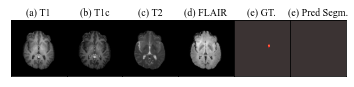

Patient name: BraTS20_Training_183
(array([ 51,  51,  51, ..., 128, 128, 129], dtype=int64), array([131, 132, 132, ..., 119, 119, 117], dtype=int64), array([60, 59, 60, ..., 66, 67, 69], dtype=int64))


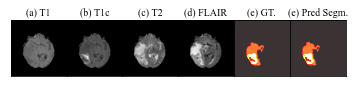

Patient name: BraTS20_Training_184
(array([ 53,  53,  53, ..., 122, 122, 122], dtype=int64), array([137, 137, 137, ..., 112, 113, 113], dtype=int64), array([64, 65, 66, ..., 66, 66, 67], dtype=int64))


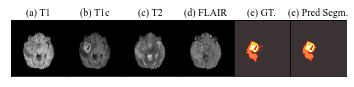

Patient name: BraTS20_Training_185
(array([112, 112, 112, ..., 177, 177, 177], dtype=int64), array([149, 149, 149, ..., 125, 125, 125], dtype=int64), array([63, 64, 65, ..., 46, 47, 48], dtype=int64))


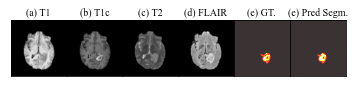

Patient name: BraTS20_Training_186
(array([122, 122, 122, ..., 182, 182, 182], dtype=int64), array([ 99,  99,  99, ..., 120, 120, 121], dtype=int64), array([75, 76, 77, ..., 55, 56, 55], dtype=int64))


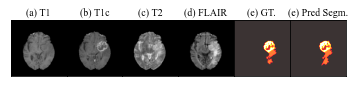

Patient name: BraTS20_Training_187
(array([ 64,  64,  64, ..., 123, 123, 123], dtype=int64), array([133, 133, 133, ..., 136, 136, 137], dtype=int64), array([84, 85, 86, ..., 83, 84, 81], dtype=int64))


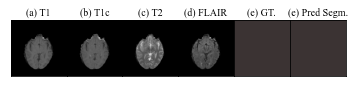

Patient name: BraTS20_Training_188
(array([ 56,  56,  57, ..., 128, 129, 129], dtype=int64), array([133, 133, 131, ..., 120, 117, 118], dtype=int64), array([65, 66, 65, ..., 66, 65, 66], dtype=int64))


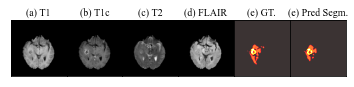

Patient name: BraTS20_Training_189
(array([ 69,  69,  69, ..., 123, 123, 123], dtype=int64), array([110, 110, 110, ..., 101, 101, 102], dtype=int64), array([ 97,  98,  99, ...,  99, 100,  99], dtype=int64))


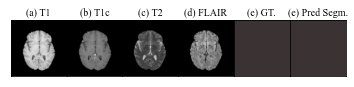

Patient name: BraTS20_Training_190
(array([129, 129, 130, ..., 180, 180, 180], dtype=int64), array([114, 114, 114, ..., 148, 148, 148], dtype=int64), array([83, 84, 81, ..., 67, 68, 69], dtype=int64))


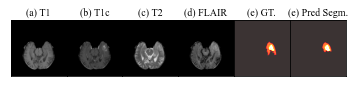

Patient name: BraTS20_Training_191
(array([ 58,  58,  58, ..., 136, 136, 136], dtype=int64), array([142, 142, 143, ..., 150, 151, 151], dtype=int64), array([90, 91, 90, ..., 79, 78, 79], dtype=int64))


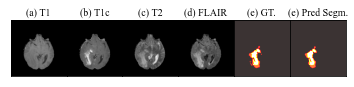

Patient name: BraTS20_Training_192
(array([118, 118, 118, ..., 168, 168, 168], dtype=int64), array([171, 171, 172, ..., 162, 162, 163], dtype=int64), array([109, 110, 109, ...,  97,  98,  96], dtype=int64))


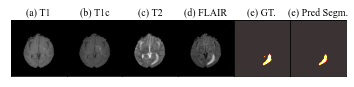

Patient name: BraTS20_Training_193
(array([ 61,  61,  61, ..., 122, 122, 122], dtype=int64), array([ 96,  96,  96, ..., 106, 107, 107], dtype=int64), array([82, 83, 84, ..., 90, 88, 89], dtype=int64))


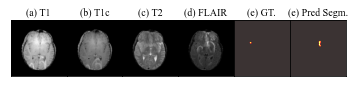

Patient name: BraTS20_Training_194
(array([127, 127, 128, ..., 184, 184, 184], dtype=int64), array([114, 114, 113, ..., 142, 142, 144], dtype=int64), array([62, 63, 61, ..., 66, 67, 66], dtype=int64))


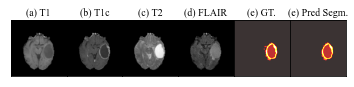

Patient name: BraTS20_Training_195
(array([131, 131, 131, ..., 181, 181, 181], dtype=int64), array([111, 112, 112, ..., 119, 119, 121], dtype=int64), array([45, 45, 46, ..., 62, 63, 61], dtype=int64))


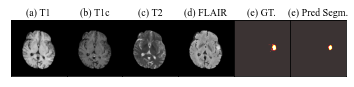

Patient name: BraTS20_Training_196
(array([113, 113, 114, ..., 184, 184, 185], dtype=int64), array([111, 111, 109, ..., 148, 149, 131], dtype=int64), array([72, 73, 73, ..., 69, 67, 62], dtype=int64))


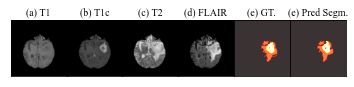

Patient name: BraTS20_Training_197
(array([ 65,  65,  65, ..., 127, 127, 127], dtype=int64), array([104, 104, 104, ..., 103, 104, 104], dtype=int64), array([86, 87, 88, ..., 70, 69, 70], dtype=int64))


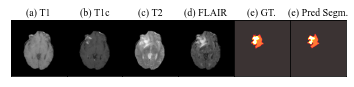

Patient name: BraTS20_Training_198
(array([ 52,  52,  52, ..., 111, 111, 111], dtype=int64), array([129, 129, 129, ..., 113, 113, 113], dtype=int64), array([55, 56, 57, ..., 61, 62, 63], dtype=int64))


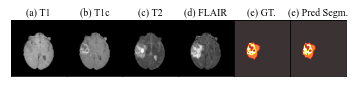

Patient name: BraTS20_Training_199
(array([ 70,  70,  70, ..., 118, 118, 118], dtype=int64), array([160, 160, 161, ..., 178, 178, 178], dtype=int64), array([106, 107, 104, ..., 109, 110, 111], dtype=int64))


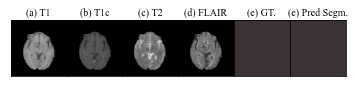

Patient name: BraTS20_Training_200
(array([ 58,  58,  58, ..., 105, 105, 105], dtype=int64), array([109, 110, 111, ..., 105, 106, 106], dtype=int64), array([51, 53, 53, ..., 50, 49, 50], dtype=int64))


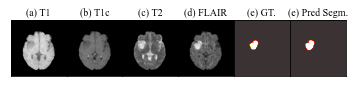

Patient name: BraTS20_Training_201
(array([112, 112, 113, ..., 182, 182, 182], dtype=int64), array([146, 146, 144, ..., 160, 161, 161], dtype=int64), array([74, 75, 73, ..., 80, 78, 79], dtype=int64))


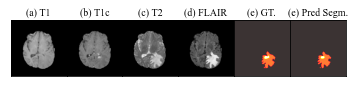

Patient name: BraTS20_Training_202
(array([120, 120, 120, ..., 179, 179, 179], dtype=int64), array([192, 193, 193, ..., 165, 166, 167], dtype=int64), array([45, 44, 45, ..., 57, 57, 58], dtype=int64))


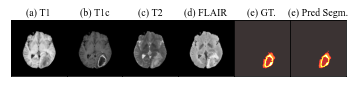

Patient name: BraTS20_Training_203
(array([122, 122, 122, ..., 181, 181, 182], dtype=int64), array([ 68,  69,  69, ..., 156, 156, 139], dtype=int64), array([68, 67, 68, ..., 72, 73, 58], dtype=int64))


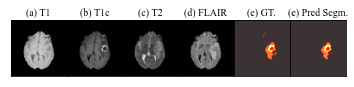

Patient name: BraTS20_Training_204
(array([53, 53, 53, ..., 86, 86, 87], dtype=int64), array([120, 120, 120, ..., 120, 120, 115], dtype=int64), array([57, 60, 61, ..., 59, 60, 56], dtype=int64))


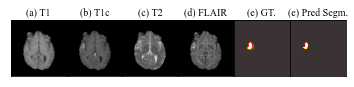

Patient name: BraTS20_Training_205
(array([131, 131, 131, ..., 182, 182, 182], dtype=int64), array([161, 161, 162, ..., 144, 145, 145], dtype=int64), array([95, 96, 96, ..., 90, 90, 91], dtype=int64))


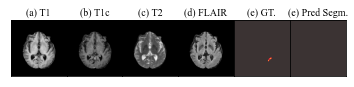

Patient name: BraTS20_Training_206
(array([ 65,  65,  65, ..., 103, 104, 105], dtype=int64), array([114, 114, 114, ..., 123, 121, 121], dtype=int64), array([62, 63, 64, ..., 69, 67, 67], dtype=int64))


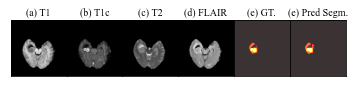

Patient name: BraTS20_Training_207
(array([118, 118, 118, ..., 185, 185, 185], dtype=int64), array([112, 112, 112, ..., 122, 123, 123], dtype=int64), array([100, 101, 102, ...,  54,  52,  53], dtype=int64))


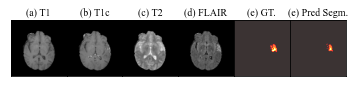

Patient name: BraTS20_Training_208
(array([112, 112, 112, ..., 186, 186, 186], dtype=int64), array([142, 143, 143, ..., 146, 147, 147], dtype=int64), array([79, 78, 79, ..., 73, 72, 73], dtype=int64))


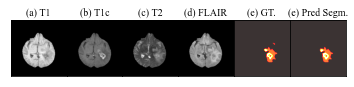

Patient name: BraTS20_Training_209
(array([ 53,  53,  53, ..., 108, 109, 109], dtype=int64), array([127, 128, 128, ..., 110, 109, 110], dtype=int64), array([64, 62, 64, ..., 50, 50, 50], dtype=int64))


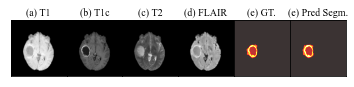

Patient name: BraTS20_Training_210
(array([ 92,  92,  92, ..., 175, 175, 175], dtype=int64), array([ 88,  88,  88, ..., 112, 112, 112], dtype=int64), array([86, 87, 88, ..., 89, 90, 91], dtype=int64))


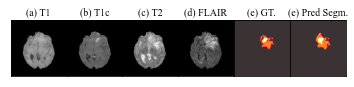

Patient name: BraTS20_Training_211
(array([ 53,  54,  54, ..., 123, 124, 124], dtype=int64), array([119, 119, 119, ..., 111, 110, 110], dtype=int64), array([49, 48, 49, ..., 70, 69, 70], dtype=int64))


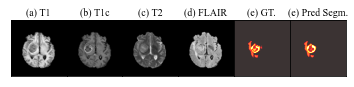

Patient name: BraTS20_Training_212
(array([ 88,  89,  89, ..., 172, 172, 172], dtype=int64), array([102,  98,  98, ..., 113, 113, 113], dtype=int64), array([98, 97, 98, ..., 88, 89, 90], dtype=int64))


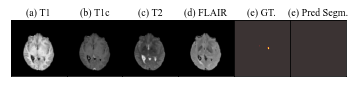

Patient name: BraTS20_Training_213
(array([129, 129, 129, ..., 175, 175, 175], dtype=int64), array([177, 178, 178, ..., 168, 168, 168], dtype=int64), array([53, 52, 53, ..., 58, 59, 60], dtype=int64))


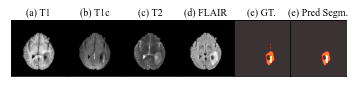

Patient name: BraTS20_Training_214
(array([ 56,  57,  57, ..., 115, 115, 115], dtype=int64), array([146, 136, 136, ..., 125, 125, 125], dtype=int64), array([65, 60, 61, ..., 72, 73, 74], dtype=int64))


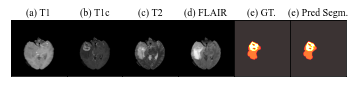

Patient name: BraTS20_Training_215
(array([129, 129, 129, ..., 180, 180, 180], dtype=int64), array([145, 146, 147, ..., 149, 149, 149], dtype=int64), array([84, 84, 84, ..., 57, 58, 69], dtype=int64))


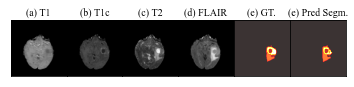

Patient name: BraTS20_Training_216
(array([ 93,  93,  93, ..., 165, 165, 165], dtype=int64), array([179, 179, 181, ..., 178, 178, 179], dtype=int64), array([73, 74, 72, ..., 72, 74, 72], dtype=int64))


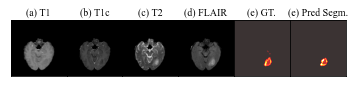

Patient name: BraTS20_Training_217
(array([127, 127, 128, ..., 173, 173, 174], dtype=int64), array([148, 149, 149, ..., 181, 182, 180], dtype=int64), array([25, 28, 25, ..., 59, 59, 55], dtype=int64))


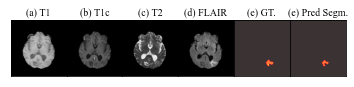

Patient name: BraTS20_Training_218
(array([117, 118, 118, ..., 180, 180, 180], dtype=int64), array([ 97,  96,  96, ..., 123, 124, 124], dtype=int64), array([66, 62, 63, ..., 55, 54, 55], dtype=int64))


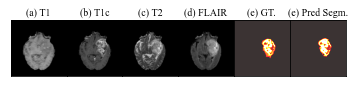

Patient name: BraTS20_Training_219
(array([132, 132, 133, ..., 182, 182, 182], dtype=int64), array([ 93,  93,  96, ..., 136, 136, 136], dtype=int64), array([68, 69, 67, ..., 60, 61, 62], dtype=int64))


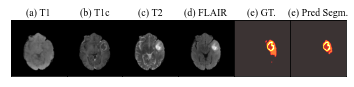

Patient name: BraTS20_Training_220
(array([ 53,  53,  53, ..., 120, 121, 122], dtype=int64), array([136, 137, 138, ..., 146, 144, 145], dtype=int64), array([82, 82, 82, ..., 92, 93, 93], dtype=int64))


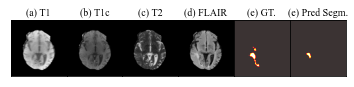

Patient name: BraTS20_Training_221
(array([104, 104, 104, ..., 181, 181, 181], dtype=int64), array([159, 159, 159, ..., 153, 153, 153], dtype=int64), array([77, 78, 79, ..., 64, 65, 66], dtype=int64))


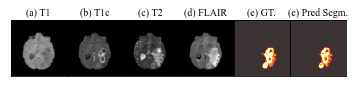

Patient name: BraTS20_Training_222
(array([ 67,  67,  67, ..., 106, 106, 106], dtype=int64), array([134, 134, 134, ..., 146, 146, 147], dtype=int64), array([103, 104, 105, ..., 111, 112, 110], dtype=int64))


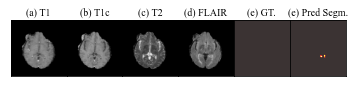

Patient name: BraTS20_Training_223
(array([ 65,  65,  65, ..., 137, 137, 137], dtype=int64), array([98, 98, 99, ..., 95, 96, 96], dtype=int64), array([82, 83, 78, ..., 82, 81, 82], dtype=int64))


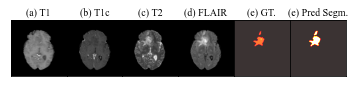

Patient name: BraTS20_Training_224
(array([120, 120, 120, ..., 181, 181, 182], dtype=int64), array([145, 146, 146, ..., 140, 140, 139], dtype=int64), array([85, 84, 85, ..., 65, 66, 65], dtype=int64))


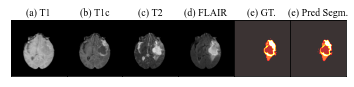

Patient name: BraTS20_Training_225
(array([ 57,  57,  57, ..., 132, 133, 133], dtype=int64), array([145, 145, 145, ..., 156, 155, 156], dtype=int64), array([92, 93, 94, ..., 73, 73, 72], dtype=int64))


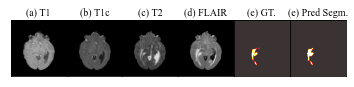

Patient name: BraTS20_Training_226
(array([120, 120, 120, ..., 174, 174, 174], dtype=int64), array([123, 123, 124, ..., 133, 133, 133], dtype=int64), array([51, 52, 53, ..., 60, 61, 62], dtype=int64))


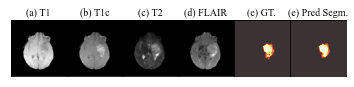

Patient name: BraTS20_Training_227
(array([ 93,  93, 104, ..., 183, 183, 183], dtype=int64), array([116, 117,  99, ..., 151, 152, 153], dtype=int64), array([45, 45, 67, ..., 46, 46, 46], dtype=int64))


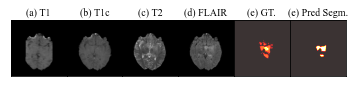

Patient name: BraTS20_Training_228
(array([ 56,  56,  56, ..., 108, 108, 108], dtype=int64), array([130, 131, 132, ..., 113, 113, 113], dtype=int64), array([77, 77, 63, ..., 59, 60, 61], dtype=int64))


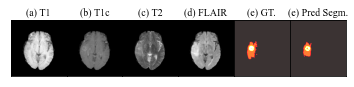

Patient name: BraTS20_Training_229
(array([101, 101, 101, ..., 155, 155, 155], dtype=int64), array([ 94,  94,  95, ..., 111, 111, 111], dtype=int64), array([91, 93, 91, ..., 94, 95, 96], dtype=int64))


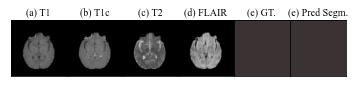

Patient name: BraTS20_Training_230
(array([120, 121, 121, ..., 169, 169, 169], dtype=int64), array([102, 106, 106, ..., 135, 135, 136], dtype=int64), array([ 99, 121, 122, ..., 103, 104, 103], dtype=int64))


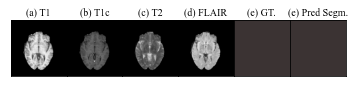

Patient name: BraTS20_Training_231
(array([ 57,  57,  57, ..., 110, 110, 110], dtype=int64), array([146, 146, 146, ..., 155, 155, 155], dtype=int64), array([66, 67, 68, ..., 93, 94, 95], dtype=int64))


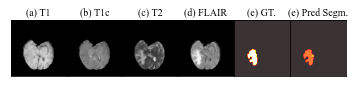

Patient name: BraTS20_Training_232
(array([132, 132, 132, ..., 186, 186, 186], dtype=int64), array([181, 181, 181, ..., 151, 152, 152], dtype=int64), array([65, 66, 67, ..., 54, 53, 54], dtype=int64))


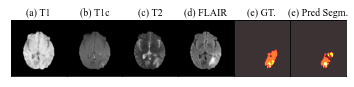

Patient name: BraTS20_Training_233
(array([146, 146, 146, ..., 178, 178, 178], dtype=int64), array([181, 181, 182, ..., 161, 162, 164], dtype=int64), array([103, 104, 103, ...,  82,  76,  76], dtype=int64))


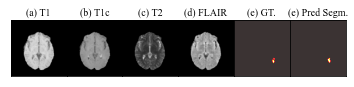

Patient name: BraTS20_Training_234
(array([102, 102, 102, ..., 173, 173, 173], dtype=int64), array([ 92,  93,  94, ..., 105, 105, 105], dtype=int64), array([62, 63, 64, ..., 63, 64, 65], dtype=int64))


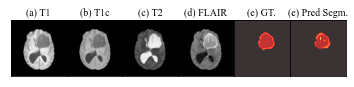

Patient name: BraTS20_Training_235
(array([ 62,  62,  62, ..., 140, 140, 140], dtype=int64), array([113, 114, 114, ...,  94,  95,  95], dtype=int64), array([92, 89, 90, ..., 95, 94, 96], dtype=int64))


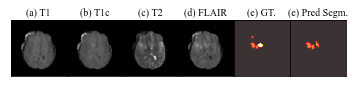

Patient name: BraTS20_Training_236
(array([ 59,  59,  59, ..., 123, 123, 123], dtype=int64), array([136, 136, 136, ..., 183, 184, 184], dtype=int64), array([51, 52, 53, ..., 99, 97, 98], dtype=int64))


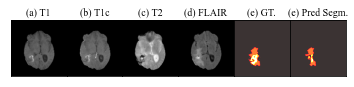

Patient name: BraTS20_Training_237
(array([ 55,  55,  55, ..., 133, 133, 133], dtype=int64), array([129, 130, 130, ..., 109, 109, 109], dtype=int64), array([72, 71, 72, ..., 73, 74, 75], dtype=int64))


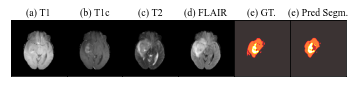

Patient name: BraTS20_Training_238
(array([106, 106, 106, ..., 183, 183, 183], dtype=int64), array([ 97,  97,  98, ..., 151, 151, 152], dtype=int64), array([60, 61, 60, ..., 73, 74, 73], dtype=int64))


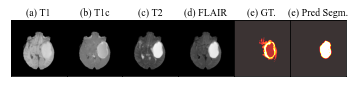

Patient name: BraTS20_Training_239
(array([ 58,  59,  59, ..., 132, 132, 133], dtype=int64), array([139, 137, 138, ..., 161, 161, 161], dtype=int64), array([89, 89, 89, ..., 86, 87, 87], dtype=int64))


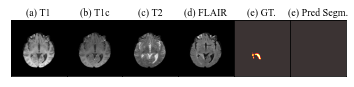

Patient name: BraTS20_Training_240
(array([116, 116, 116, ..., 178, 178, 178], dtype=int64), array([111, 111, 111, ..., 158, 158, 158], dtype=int64), array([60, 61, 62, ..., 72, 73, 74], dtype=int64))


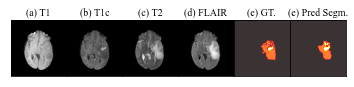

Patient name: BraTS20_Training_241
(array([ 54,  54,  55, ..., 130, 130, 130], dtype=int64), array([125, 125, 120, ..., 112, 112, 113], dtype=int64), array([73, 74, 75, ..., 89, 90, 89], dtype=int64))


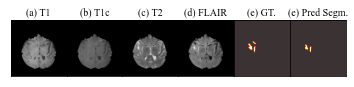

Patient name: BraTS20_Training_242
(array([129, 129, 129, ..., 179, 179, 179], dtype=int64), array([155, 157, 157, ..., 121, 121, 121], dtype=int64), array([51, 48, 52, ..., 47, 48, 49], dtype=int64))


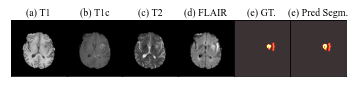

Patient name: BraTS20_Training_243
(array([ 51,  51,  51, ..., 128, 128, 128], dtype=int64), array([138, 138, 139, ..., 110, 110, 111], dtype=int64), array([59, 60, 58, ..., 60, 61, 60], dtype=int64))


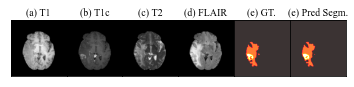

Patient name: BraTS20_Training_244
(array([ 55,  55,  55, ..., 112, 112, 112], dtype=int64), array([153, 153, 154, ..., 130, 130, 130], dtype=int64), array([67, 68, 67, ..., 79, 83, 84], dtype=int64))


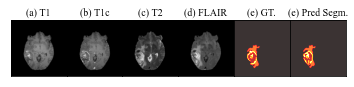

Patient name: BraTS20_Training_245
(array([106, 107, 107, ..., 182, 182, 182], dtype=int64), array([ 95,  92,  99, ..., 125, 126, 127], dtype=int64), array([60, 64, 65, ..., 46, 45, 45], dtype=int64))


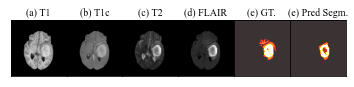

Patient name: BraTS20_Training_246
(array([128, 129, 129, ..., 183, 183, 183], dtype=int64), array([149, 143, 144, ..., 148, 149, 150], dtype=int64), array([70, 64, 63, ..., 62, 51, 51], dtype=int64))


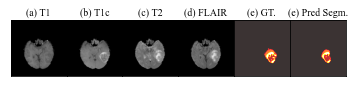

Patient name: BraTS20_Training_247
(array([ 62,  62,  63, ..., 146, 146, 147], dtype=int64), array([167, 167, 159, ..., 181, 181, 178], dtype=int64), array([69, 70, 84, ..., 55, 56, 53], dtype=int64))


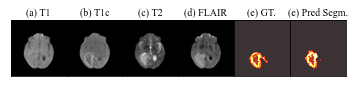

Patient name: BraTS20_Training_248
(array([112, 112, 112, ..., 162, 163, 163], dtype=int64), array([161, 162, 163, ..., 166, 163, 164], dtype=int64), array([93, 93, 93, ..., 84, 83, 84], dtype=int64))


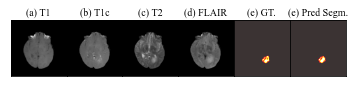

Patient name: BraTS20_Training_249
(array([134, 134, 134, ..., 184, 184, 184], dtype=int64), array([121, 121, 121, ..., 128, 129, 129], dtype=int64), array([53, 54, 55, ..., 43, 42, 43], dtype=int64))


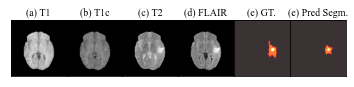

Patient name: BraTS20_Training_250
(array([128, 128, 128, ..., 187, 187, 187], dtype=int64), array([107, 108, 109, ..., 123, 125, 125], dtype=int64), array([55, 55, 55, ..., 55, 51, 52], dtype=int64))


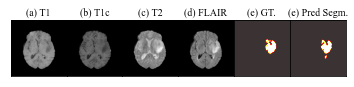

Patient name: BraTS20_Training_251
(array([129, 129, 129, ..., 179, 179, 179], dtype=int64), array([104, 104, 104, ..., 133, 133, 133], dtype=int64), array([93, 94, 95, ..., 80, 81, 82], dtype=int64))


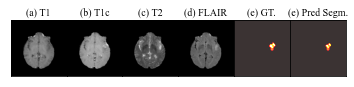

Patient name: BraTS20_Training_252
(array([101, 101, 102, ..., 176, 176, 176], dtype=int64), array([100, 101,  88, ...,  99, 100, 100], dtype=int64), array([77, 77, 82, ..., 93, 92, 93], dtype=int64))


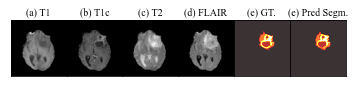

Patient name: BraTS20_Training_253
(array([133, 133, 133, ..., 177, 177, 177], dtype=int64), array([147, 147, 147, ..., 150, 150, 150], dtype=int64), array([59, 60, 61, ..., 53, 54, 55], dtype=int64))


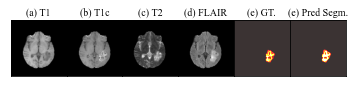

Patient name: BraTS20_Training_254
(array([117, 117, 117, ..., 177, 177, 177], dtype=int64), array([139, 144, 144, ..., 149, 149, 149], dtype=int64), array([92, 85, 86, ..., 89, 90, 91], dtype=int64))


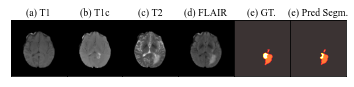

Patient name: BraTS20_Training_255
(array([126, 126, 126, ..., 188, 188, 188], dtype=int64), array([139, 140, 140, ..., 153, 153, 154], dtype=int64), array([79, 78, 79, ..., 58, 59, 58], dtype=int64))


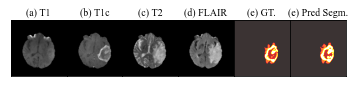

Patient name: BraTS20_Training_256
(array([ 50,  50,  50, ..., 116, 116, 116], dtype=int64), array([125, 126, 126, ..., 140, 141, 142], dtype=int64), array([56, 54, 55, ..., 78, 78, 78], dtype=int64))


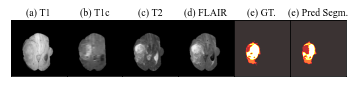

Patient name: BraTS20_Training_257
(array([ 56,  56,  56, ..., 108, 108, 109], dtype=int64), array([143, 143, 143, ..., 144, 145, 136], dtype=int64), array([78, 79, 80, ..., 85, 83, 90], dtype=int64))


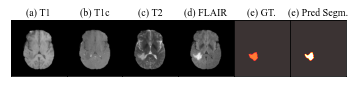

Patient name: BraTS20_Training_258
(array([ 67,  67,  67, ..., 140, 140, 140], dtype=int64), array([86, 87, 87, ..., 97, 97, 98], dtype=int64), array([80, 80, 81, ..., 84, 85, 84], dtype=int64))


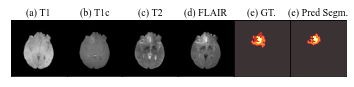

Patient name: BraTS20_Training_259
(array([ 66,  66,  66, ..., 129, 129, 129], dtype=int64), array([111, 111, 111, ..., 110, 111, 112], dtype=int64), array([83, 84, 85, ..., 92, 92, 92], dtype=int64))


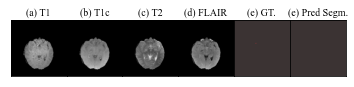

Patient name: BraTS20_Training_260
(array([ 77,  77,  77, ..., 130, 130, 130], dtype=int64), array([136, 136, 137, ..., 144, 144, 145], dtype=int64), array([55, 56, 54, ..., 51, 57, 51], dtype=int64))


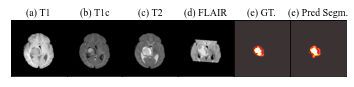

Patient name: BraTS20_Training_261
(array([ 90,  90,  90, ..., 179, 179, 179], dtype=int64), array([ 78,  78,  79, ...,  98, 100, 101], dtype=int64), array([82, 83, 82, ..., 77, 78, 78], dtype=int64))


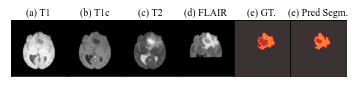

Patient name: BraTS20_Training_262
(array([134, 134, 134, ..., 185, 185, 185], dtype=int64), array([148, 149, 150, ..., 145, 145, 146], dtype=int64), array([95, 95, 95, ..., 72, 73, 72], dtype=int64))


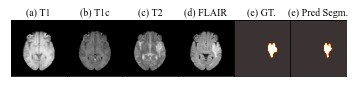

Patient name: BraTS20_Training_263
(array([119, 119, 119, ..., 152, 152, 152], dtype=int64), array([100, 100, 101, ..., 100, 100, 101], dtype=int64), array([109, 110, 109, ..., 123, 124, 124], dtype=int64))


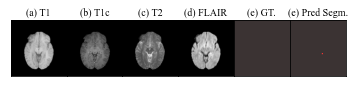

Patient name: BraTS20_Training_264
(array([ 65,  65,  65, ..., 105, 105, 105], dtype=int64), array([74, 74, 74, ..., 78, 78, 79], dtype=int64), array([79, 80, 81, ..., 70, 72, 70], dtype=int64))


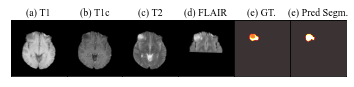

Patient name: BraTS20_Training_265
(array([127, 127, 127, ..., 171, 171, 171], dtype=int64), array([117, 118, 119, ..., 111, 111, 112], dtype=int64), array([92, 92, 92, ..., 75, 79, 79], dtype=int64))


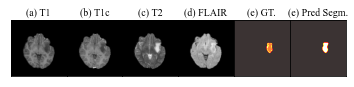

Patient name: BraTS20_Training_266
(array([131, 131, 131, ..., 178, 178, 178], dtype=int64), array([112, 113, 113, ..., 111, 112, 112], dtype=int64), array([108, 102, 108, ...,  91,  91,  97], dtype=int64))


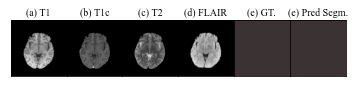

Patient name: BraTS20_Training_267
(array([139, 139, 140, ..., 191, 191, 191], dtype=int64), array([113, 114, 108, ..., 134, 134, 135], dtype=int64), array([58, 58, 44, ..., 59, 61, 61], dtype=int64))


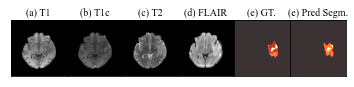

Patient name: BraTS20_Training_268
(array([64, 64, 64, ..., 97, 97, 97], dtype=int64), array([139, 145, 146, ..., 147, 148, 148], dtype=int64), array([49, 58, 58, ..., 56, 54, 56], dtype=int64))


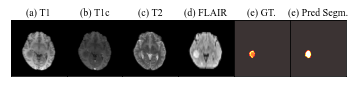

Patient name: BraTS20_Training_269
(array([119, 120, 120, ..., 157, 157, 157], dtype=int64), array([80, 77, 77, ..., 78, 79, 79], dtype=int64), array([96, 95, 96, ..., 96, 95, 96], dtype=int64))


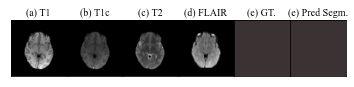

Patient name: BraTS20_Training_270
(array([ 60,  60,  60, ..., 123, 123, 123], dtype=int64), array([129, 129, 130, ..., 108, 108, 109], dtype=int64), array([69, 70, 69, ..., 90, 91, 90], dtype=int64))


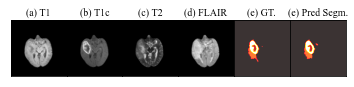

Patient name: BraTS20_Training_271
(array([ 69,  69,  69, ..., 109, 109, 109], dtype=int64), array([117, 118, 118, ..., 113, 114, 114], dtype=int64), array([74, 72, 75, ..., 53, 50, 51], dtype=int64))


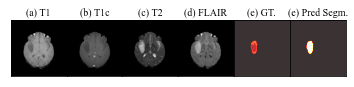

Patient name: BraTS20_Training_272
(array([ 54,  54,  54, ..., 123, 123, 128], dtype=int64), array([131, 131, 131, ..., 123, 123, 137], dtype=int64), array([58, 59, 60, ..., 59, 60, 68], dtype=int64))


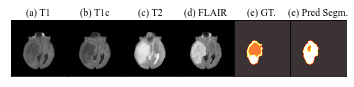

Patient name: BraTS20_Training_273
(array([ 85,  86,  86, ..., 180, 180, 180], dtype=int64), array([129, 169, 169, ..., 129, 129, 130], dtype=int64), array([47, 67, 68, ..., 53, 54, 52], dtype=int64))


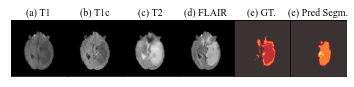

Patient name: BraTS20_Training_274
(array([ 60,  60,  60, ..., 150, 150, 150], dtype=int64), array([102, 102, 102, ..., 111, 112, 113], dtype=int64), array([85, 86, 87, ..., 89, 89, 89], dtype=int64))


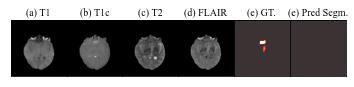

Patient name: BraTS20_Training_275
(array([123, 123, 123, ..., 175, 175, 175], dtype=int64), array([145, 146, 146, ..., 125, 125, 126], dtype=int64), array([72, 71, 72, ..., 43, 44, 43], dtype=int64))


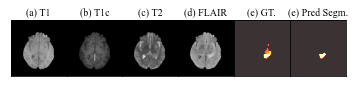

Patient name: BraTS20_Training_276
(array([ 62,  65,  66, ..., 118, 118, 118], dtype=int64), array([136, 132, 131, ..., 127, 128, 129], dtype=int64), array([ 88, 105, 103, ..., 104, 104, 104], dtype=int64))


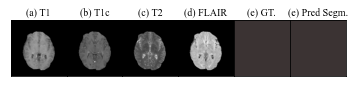

Patient name: BraTS20_Training_277
(array([134, 134, 134, ..., 185, 185, 185], dtype=int64), array([211, 211, 212, ..., 165, 169, 170], dtype=int64), array([65, 66, 65, ..., 78, 85, 84], dtype=int64))


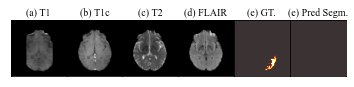

Patient name: BraTS20_Training_278
(array([ 53,  53,  53, ..., 116, 116, 116], dtype=int64), array([144, 145, 145, ..., 143, 143, 143], dtype=int64), array([64, 63, 64, ..., 73, 74, 75], dtype=int64))


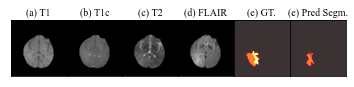

Patient name: BraTS20_Training_279
(array([ 56,  57,  57, ..., 119, 119, 119], dtype=int64), array([167, 166, 167, ..., 189, 189, 190], dtype=int64), array([ 74,  74,  74, ..., 108, 109, 108], dtype=int64))


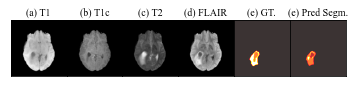

Patient name: BraTS20_Training_280
(array([137, 137, 137, ..., 180, 180, 180], dtype=int64), array([101, 101, 101, ..., 135, 135, 135], dtype=int64), array([85, 86, 87, ..., 80, 81, 82], dtype=int64))


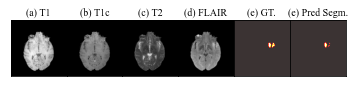

Patient name: BraTS20_Training_281
(array([ 62,  62,  62, ..., 128, 128, 129], dtype=int64), array([132, 132, 133, ..., 152, 152, 151], dtype=int64), array([93, 94, 92, ..., 81, 82, 82], dtype=int64))


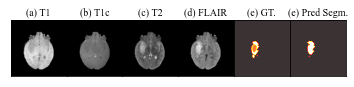

Patient name: BraTS20_Training_282
(array([ 66,  66,  66, ..., 127, 127, 127], dtype=int64), array([105, 111, 112, ..., 110, 110, 110], dtype=int64), array([74, 55, 54, ..., 67, 68, 69], dtype=int64))


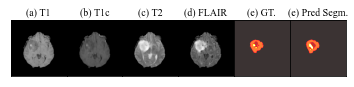

Patient name: BraTS20_Training_283
(array([ 79,  79,  79, ..., 122, 122, 122], dtype=int64), array([163, 164, 165, ..., 156, 157, 157], dtype=int64), array([115, 115, 115, ..., 125, 124, 125], dtype=int64))


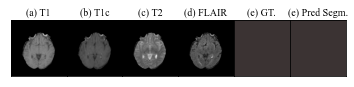

Patient name: BraTS20_Training_284
(array([ 70,  70,  70, ..., 150, 151, 152], dtype=int64), array([ 73,  73,  73, ..., 114, 114, 114], dtype=int64), array([85, 90, 92, ..., 92, 91, 91], dtype=int64))


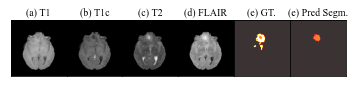

Patient name: BraTS20_Training_285
(array([103, 103, 103, ..., 167, 167, 167], dtype=int64), array([100, 100, 101, ..., 105, 106, 106], dtype=int64), array([81, 82, 81, ..., 91, 89, 90], dtype=int64))


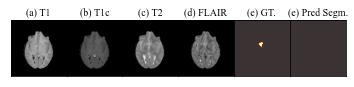

Patient name: BraTS20_Training_286
(array([118, 118, 118, ..., 148, 148, 148], dtype=int64), array([65, 66, 67, ..., 79, 79, 83], dtype=int64), array([ 80,  80,  80, ...,  82,  83, 110], dtype=int64))


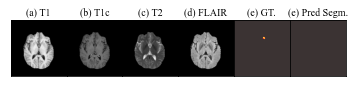

Patient name: BraTS20_Training_287
(array([ 56,  56,  56, ...,  98, 144, 148], dtype=int64), array([135, 135, 135, ..., 147, 153, 119], dtype=int64), array([92, 93, 94, ..., 90, 56, 39], dtype=int64))


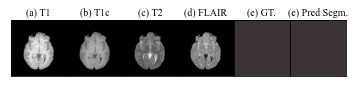

Patient name: BraTS20_Training_288
(array([51, 51, 51, ..., 99, 99, 99], dtype=int64), array([124, 125, 126, ..., 152, 153, 154], dtype=int64), array([43, 43, 43, ..., 47, 46, 46], dtype=int64))


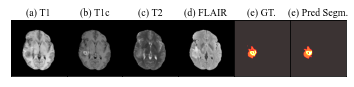

Patient name: BraTS20_Training_289
(array([ 59,  59,  59, ..., 133, 133, 133], dtype=int64), array([106, 106, 107, ..., 114, 114, 115], dtype=int64), array([58, 59, 57, ..., 74, 75, 75], dtype=int64))


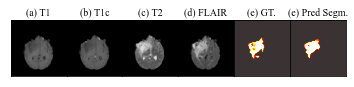

Patient name: BraTS20_Training_290
(array([ 97,  97,  97, ..., 179, 179, 179], dtype=int64), array([101, 102, 103, ..., 108, 108, 108], dtype=int64), array([85, 85, 86, ..., 81, 82, 83], dtype=int64))


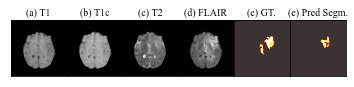

Patient name: BraTS20_Training_291
(array([ 59,  59,  59, ..., 137, 137, 138], dtype=int64), array([113, 113, 113, ..., 102, 103, 100], dtype=int64), array([81, 82, 83, ..., 88, 86, 87], dtype=int64))


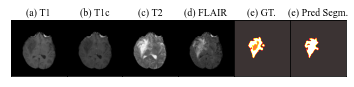

Patient name: BraTS20_Training_292
(array([ 63,  63,  63, ..., 116, 116, 116], dtype=int64), array([120, 120, 121, ..., 147, 147, 148], dtype=int64), array([39, 40, 38, ..., 58, 59, 58], dtype=int64))


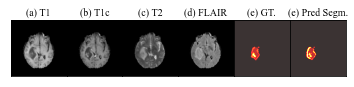

Patient name: BraTS20_Training_293
(array([ 57,  57,  58, ..., 166, 166, 171], dtype=int64), array([121, 132, 108, ...,  80,  80,  75], dtype=int64), array([64, 62, 88, ..., 75, 97, 80], dtype=int64))


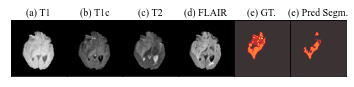

Patient name: BraTS20_Training_294
(array([ 54,  54,  54, ..., 108, 108, 108], dtype=int64), array([123, 124, 124, ..., 145, 146, 147], dtype=int64), array([49, 48, 49, ..., 57, 57, 57], dtype=int64))


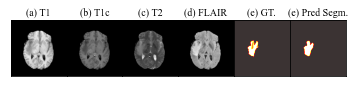

Patient name: BraTS20_Training_295
(array([ 82,  82,  82, ..., 118, 119, 120], dtype=int64), array([102, 103, 103, ..., 107,  98,  99], dtype=int64), array([118, 118, 119, ..., 124, 115, 114], dtype=int64))


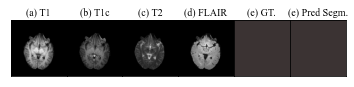

Patient name: BraTS20_Training_296
(array([112, 112, 112, ..., 182, 182, 182], dtype=int64), array([142, 142, 142, ..., 140, 140, 140], dtype=int64), array([50, 51, 52, ..., 68, 69, 70], dtype=int64))


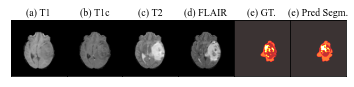

Patient name: BraTS20_Training_297
(array([119, 119, 119, ..., 179, 179, 180], dtype=int64), array([159, 159, 161, ..., 159, 159, 159], dtype=int64), array([119, 120, 121, ...,  85,  86,  82], dtype=int64))


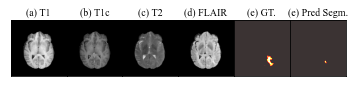

Patient name: BraTS20_Training_298
(array([ 85,  85,  85, ..., 130, 130, 131], dtype=int64), array([ 99, 100, 100, ...,  96,  96,  94], dtype=int64), array([68, 65, 66, ..., 79, 80, 80], dtype=int64))


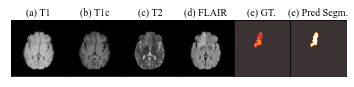

Patient name: BraTS20_Training_299
(array([126, 126, 127, ..., 185, 185, 185], dtype=int64), array([124, 127, 119, ..., 126, 127, 128], dtype=int64), array([93, 93, 92, ..., 79, 79, 79], dtype=int64))


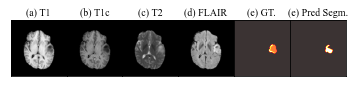

Patient name: BraTS20_Training_300
(array([105, 105, 106, ..., 171, 171, 171], dtype=int64), array([100, 101,  97, ...,  94,  94,  95], dtype=int64), array([83, 83, 83, ..., 79, 80, 79], dtype=int64))


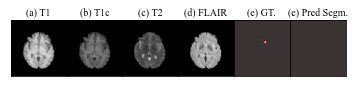

Patient name: BraTS20_Training_301
(array([ 96,  96,  96, ..., 168, 168, 168], dtype=int64), array([95, 95, 96, ..., 93, 93, 93], dtype=int64), array([97, 98, 96, ..., 90, 91, 92], dtype=int64))


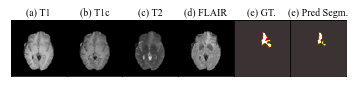

Patient name: BraTS20_Training_302
(array([ 50,  50,  50, ..., 102, 103, 106], dtype=int64), array([124, 125, 126, ..., 116, 114, 122], dtype=int64), array([55, 55, 55, ..., 59, 58, 63], dtype=int64))


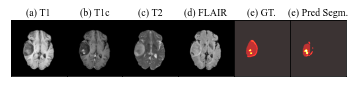

Patient name: BraTS20_Training_303
(array([116, 116, 116, ..., 156, 156, 156], dtype=int64), array([ 95,  96,  97, ...,  65,  66, 103], dtype=int64), array([122, 122, 122, ...,  86,  86, 110], dtype=int64))


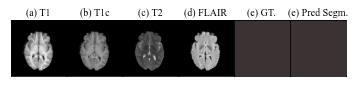

Patient name: BraTS20_Training_304
(array([ 74,  74,  74, ..., 114, 114, 114], dtype=int64), array([105, 110, 111, ..., 119, 119, 119], dtype=int64), array([48, 52, 52, ..., 53, 54, 55], dtype=int64))


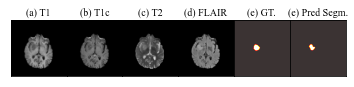

Patient name: BraTS20_Training_305
(array([ 73,  73,  73, ..., 145, 146, 147], dtype=int64), array([91, 91, 91, ..., 99, 91, 92], dtype=int64), array([92, 93, 94, ..., 97, 97, 95], dtype=int64))


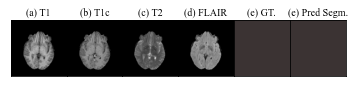

Patient name: BraTS20_Training_306
(array([ 97,  97,  98, ..., 176, 176, 176], dtype=int64), array([120, 120, 118, ..., 108, 109, 110], dtype=int64), array([93, 94, 93, ..., 96, 96, 96], dtype=int64))


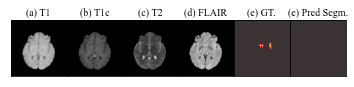

Patient name: BraTS20_Training_307
(array([ 62,  63,  63, ..., 132, 132, 132], dtype=int64), array([121, 117, 118, ..., 101, 101, 106], dtype=int64), array([63, 56, 56, ..., 69, 70, 68], dtype=int64))


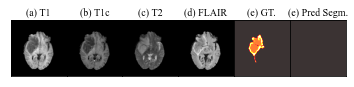

Patient name: BraTS20_Training_308
(array([ 54,  55,  55, ..., 145, 145, 145], dtype=int64), array([123, 121, 121, ...,  93,  93,  94], dtype=int64), array([83, 79, 80, ..., 91, 92, 92], dtype=int64))


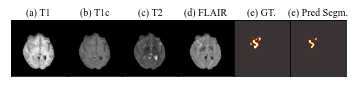

Patient name: BraTS20_Training_309
(array([108, 108, 109, ..., 182, 182, 182], dtype=int64), array([112, 112, 100, ..., 138, 139, 139], dtype=int64), array([60, 61, 64, ..., 62, 61, 62], dtype=int64))


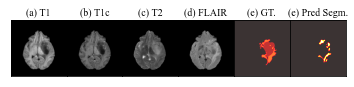

Patient name: BraTS20_Training_310
(array([ 64,  64,  65, ..., 143, 143, 143], dtype=int64), array([108, 109, 103, ...,  87,  87,  88], dtype=int64), array([71, 72, 70, ..., 73, 74, 74], dtype=int64))


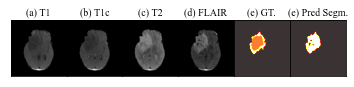

Patient name: BraTS20_Training_311
(array([127, 127, 127, ..., 173, 173, 173], dtype=int64), array([123, 123, 123, ..., 132, 132, 134], dtype=int64), array([117, 118, 119, ..., 105, 106, 106], dtype=int64))


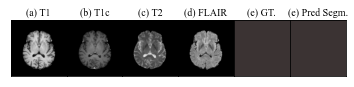

Patient name: BraTS20_Training_312
(array([ 88,  88,  89, ..., 157, 157, 157], dtype=int64), array([ 98,  99,  89, ..., 101, 102, 102], dtype=int64), array([95, 95, 94, ..., 90, 88, 89], dtype=int64))


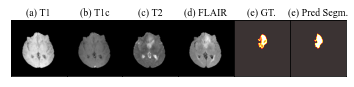

Patient name: BraTS20_Training_313
(array([ 70,  70,  71, ..., 141, 141, 141], dtype=int64), array([114, 121, 109, ..., 116, 117, 118], dtype=int64), array([ 99, 104,  99, ...,  93,  93,  92], dtype=int64))


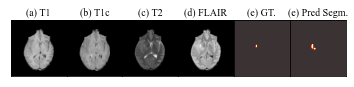

Patient name: BraTS20_Training_314
(array([124, 124, 126, ..., 175, 175, 175], dtype=int64), array([186, 187, 184, ..., 172, 173, 174], dtype=int64), array([100, 100,  91, ...,  87,  85,  86], dtype=int64))


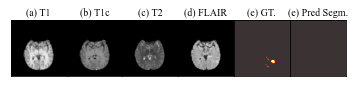

Patient name: BraTS20_Training_315
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([128, 128, 128, ..., 123, 124, 125], dtype=int64), array([105, 106, 107, ..., 100,  99,  99], dtype=int64))


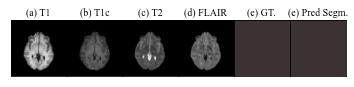

Patient name: BraTS20_Training_316
(array([ 62,  62,  62, ..., 159, 159, 159], dtype=int64), array([111, 112, 113, ..., 106, 107, 108], dtype=int64), array([71, 71, 71, ..., 78, 79, 80], dtype=int64))


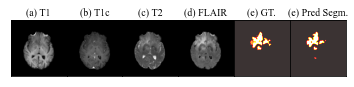

Patient name: BraTS20_Training_317
(array([152, 152, 152, ..., 186, 187, 187], dtype=int64), array([160, 161, 162, ..., 157, 151, 152], dtype=int64), array([85, 85, 85, ..., 68, 70, 70], dtype=int64))


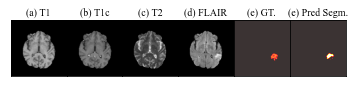

Patient name: BraTS20_Training_318
(array([ 57,  57,  57, ..., 146, 146, 146], dtype=int64), array([105, 106, 106, ...,  94,  99, 100], dtype=int64), array([82, 82, 86, ..., 83, 88, 88], dtype=int64))


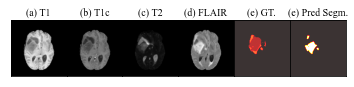

Patient name: BraTS20_Training_319
(array([ 53,  53,  53, ..., 112, 112, 112], dtype=int64), array([127, 128, 129, ..., 115, 116, 116], dtype=int64), array([66, 66, 66, ..., 68, 67, 68], dtype=int64))


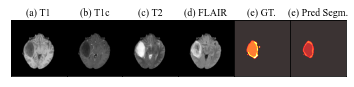

Patient name: BraTS20_Training_320
(array([ 58,  58,  58, ..., 116, 116, 116], dtype=int64), array([109, 109, 109, ..., 103, 104, 105], dtype=int64), array([78, 79, 80, ..., 66, 66, 65], dtype=int64))


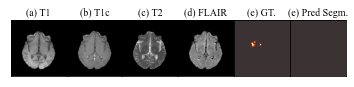

Patient name: BraTS20_Training_321
(array([ 77, 113, 115, ..., 153, 153, 170], dtype=int64), array([138,  96, 111, ..., 140, 142, 147], dtype=int64), array([121, 104, 104, ..., 119, 128,  97], dtype=int64))


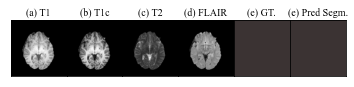

Patient name: BraTS20_Training_322
(array([122, 123, 123, ..., 183, 183, 183], dtype=int64), array([103, 102, 102, ..., 117, 117, 122], dtype=int64), array([57, 57, 58, ..., 54, 55, 47], dtype=int64))


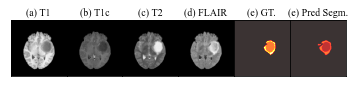

Patient name: BraTS20_Training_323
(array([ 49,  49,  49, ..., 131, 131, 131], dtype=int64), array([122, 123, 123, ..., 148, 149, 150], dtype=int64), array([56, 56, 58, ..., 78, 76, 76], dtype=int64))


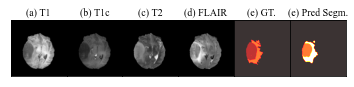

Patient name: BraTS20_Training_324
(array([ 66,  66,  66, ..., 120, 120, 121], dtype=int64), array([ 82,  83,  84, ..., 100, 100,  97], dtype=int64), array([73, 73, 73, ..., 53, 54, 53], dtype=int64))


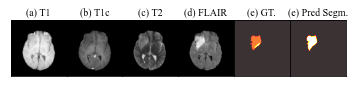

Patient name: BraTS20_Training_325
(array([ 98,  98,  98, ..., 131, 131, 132], dtype=int64), array([154, 155, 155, ..., 164, 165, 163], dtype=int64), array([34, 32, 33, ..., 43, 43, 43], dtype=int64))


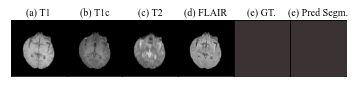

Patient name: BraTS20_Training_326
(array([111, 111, 111, ..., 168, 168, 168], dtype=int64), array([150, 151, 151, ..., 160, 161, 162], dtype=int64), array([ 85,  85,  86, ..., 113, 113, 113], dtype=int64))


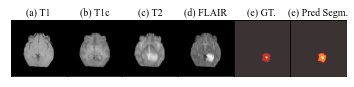

Patient name: BraTS20_Training_327
(array([ 60,  61,  61, ..., 130, 130, 130], dtype=int64), array([102,  82,  83, ..., 107, 108, 109], dtype=int64), array([73, 82, 84, ..., 74, 74, 74], dtype=int64))


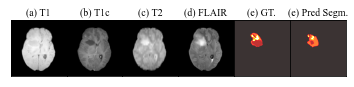

Patient name: BraTS20_Training_328
(array([ 58,  58,  58, ..., 160, 161, 161], dtype=int64), array([112, 113, 113, ...,  86,  84,  84], dtype=int64), array([48, 36, 46, ..., 80, 79, 80], dtype=int64))


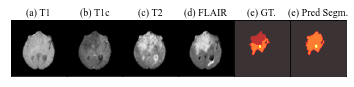

Patient name: BraTS20_Training_329
(array([ 62,  63,  63, ..., 120, 120, 121], dtype=int64), array([158, 151, 157, ..., 141, 141, 141], dtype=int64), array([55, 50, 52, ..., 81, 82, 82], dtype=int64))


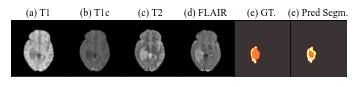

Patient name: BraTS20_Training_330
(array([121, 121, 121, ..., 173, 173, 174], dtype=int64), array([109, 110, 111, ..., 111, 112, 110], dtype=int64), array([69, 69, 69, ..., 68, 65, 62], dtype=int64))


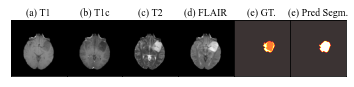

Patient name: BraTS20_Training_331
(array([129, 130, 131, ..., 183, 183, 183], dtype=int64), array([123, 120, 121, ..., 144, 144, 144], dtype=int64), array([56, 60, 59, ..., 59, 60, 61], dtype=int64))


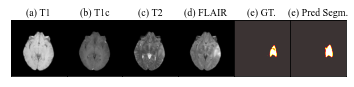

Patient name: BraTS20_Training_332
(array([123, 123, 123, ..., 172, 172, 172], dtype=int64), array([ 94,  94,  94, ..., 105, 105, 105], dtype=int64), array([112, 113, 114, ..., 100, 101, 102], dtype=int64))


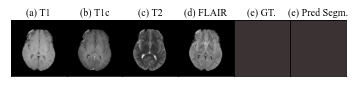

Patient name: BraTS20_Training_333
(array([116, 116, 116, ..., 184, 184, 184], dtype=int64), array([132, 132, 133, ..., 154, 155, 156], dtype=int64), array([75, 76, 73, ..., 68, 68, 68], dtype=int64))


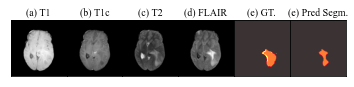

Patient name: BraTS20_Training_334
(array([ 54,  54,  54, ..., 118, 118, 118], dtype=int64), array([146, 146, 147, ..., 138, 138, 138], dtype=int64), array([60, 61, 60, ..., 84, 85, 86], dtype=int64))


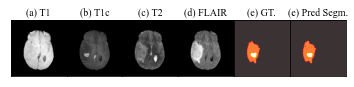

Patient name: BraTS20_Training_335
(array([109, 110, 110, ..., 177, 178, 178], dtype=int64), array([112, 112, 112, ..., 114, 113, 114], dtype=int64), array([58, 56, 57, ..., 54, 54, 54], dtype=int64))


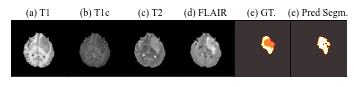

Patient name: BraTS20_Training_336
(array([114, 114, 114, ..., 162, 162, 162], dtype=int64), array([197, 197, 198, ..., 174, 174, 174], dtype=int64), array([79, 80, 77, ..., 78, 79, 80], dtype=int64))


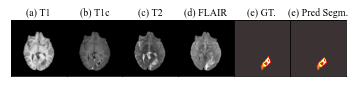

Patient name: BraTS20_Training_337
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([147, 147, 147, ..., 146, 147, 147], dtype=int64), array([93, 94, 95, ..., 88, 87, 88], dtype=int64))


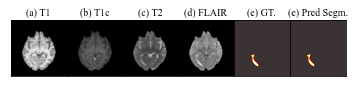

Patient name: BraTS20_Training_338
(array([ 61,  61,  61, ..., 131, 131, 132], dtype=int64), array([126, 126, 126, ..., 108, 108, 107], dtype=int64), array([82, 83, 84, ..., 76, 77, 77], dtype=int64))


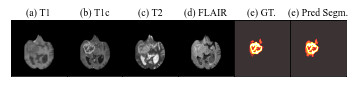

Patient name: BraTS20_Training_339
(array([ 60,  60,  60, ..., 149, 149, 149], dtype=int64), array([140, 140, 140, ..., 155, 156, 156], dtype=int64), array([ 85,  86,  87, ..., 108, 107, 108], dtype=int64))


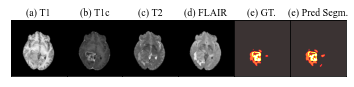

Patient name: BraTS20_Training_340
(array([ 88,  88,  88, ..., 146, 146, 161], dtype=int64), array([129, 129, 129, ..., 144, 144,  82], dtype=int64), array([ 87,  88,  89, ...,  99, 100,  98], dtype=int64))


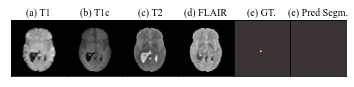

Patient name: BraTS20_Training_341
(array([155, 155, 155, ..., 182, 182, 182], dtype=int64), array([120, 120, 120, ..., 137, 137, 138], dtype=int64), array([57, 58, 59, ..., 57, 58, 57], dtype=int64))


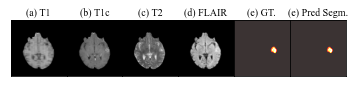

Patient name: BraTS20_Training_342
(array([ 58,  58,  58, ..., 147, 147, 147], dtype=int64), array([106, 106, 106, ..., 155, 155, 155], dtype=int64), array([59, 60, 61, ..., 80, 81, 82], dtype=int64))


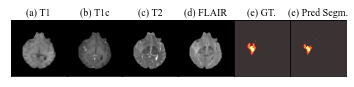

Patient name: BraTS20_Training_343
(array([ 51,  51,  51, ..., 110, 110, 110], dtype=int64), array([128, 128, 129, ..., 149, 149, 150], dtype=int64), array([71, 73, 71, ..., 66, 67, 66], dtype=int64))


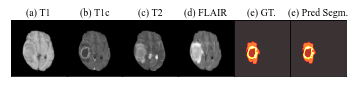

Patient name: BraTS20_Training_344
(array([127, 127, 127, ..., 239, 239, 239], dtype=int64), array([117, 117, 117, ..., 106, 106, 106], dtype=int64), array([69, 70, 71, ..., 56, 57, 58], dtype=int64))


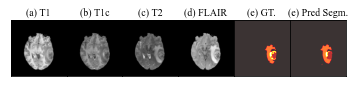

Patient name: BraTS20_Training_345
(array([ 52,  52,  52, ..., 121, 121, 121], dtype=int64), array([141, 141, 142, ..., 149, 149, 150], dtype=int64), array([69, 70, 69, ..., 76, 77, 76], dtype=int64))


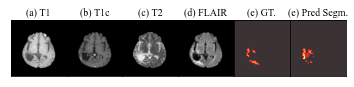

Patient name: BraTS20_Training_346
(array([ 73,  73,  73, ..., 136, 136, 140], dtype=int64), array([153, 153, 153, ..., 203, 203, 193], dtype=int64), array([102, 103, 104, ...,  57,  58,  59], dtype=int64))


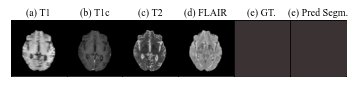

Patient name: BraTS20_Training_347
(array([ 70,  70,  70, ..., 127, 127, 127], dtype=int64), array([106, 106, 107, ..., 101, 102, 102], dtype=int64), array([104, 105, 103, ..., 104, 102, 103], dtype=int64))


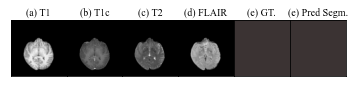

Patient name: BraTS20_Training_348
(array([116, 116, 116, ..., 164, 164, 164], dtype=int64), array([134, 134, 134, ..., 151, 151, 152], dtype=int64), array([79, 80, 81, ..., 86, 87, 85], dtype=int64))


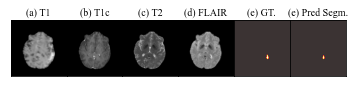

Patient name: BraTS20_Training_349
(array([ 62,  62,  62, ..., 143, 143, 143], dtype=int64), array([114, 114, 115, ...,  90,  90,  90], dtype=int64), array([93, 94, 89, ..., 84, 85, 86], dtype=int64))


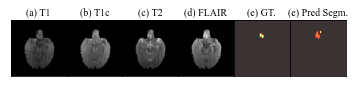

Patient name: BraTS20_Training_350
(array([ 70,  70,  70, ..., 128, 128, 129], dtype=int64), array([157, 157, 158, ..., 154, 155, 153], dtype=int64), array([ 85,  86,  84, ..., 119, 119, 119], dtype=int64))


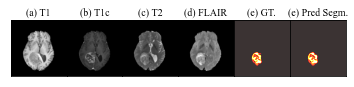

Patient name: BraTS20_Training_351
(array([ 97,  97, 101, ..., 181, 181, 181], dtype=int64), array([186, 187, 195, ..., 136, 137, 137], dtype=int64), array([57, 57, 65, ..., 54, 52, 53], dtype=int64))


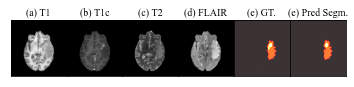

Patient name: BraTS20_Training_352
(array([ 63,  63,  63, ..., 105, 105, 105], dtype=int64), array([165, 165, 166, ..., 196, 196, 197], dtype=int64), array([110, 111, 108, ..., 108, 109, 100], dtype=int64))


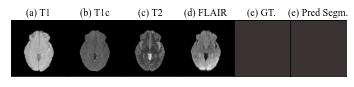

Patient name: BraTS20_Training_353
(array([131, 131, 131, ..., 179, 179, 179], dtype=int64), array([193, 193, 194, ..., 165, 166, 166], dtype=int64), array([51, 52, 51, ..., 62, 59, 60], dtype=int64))


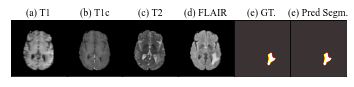

Patient name: BraTS20_Training_354
(array([ 50,  50,  50, ..., 124, 124, 124], dtype=int64), array([134, 134, 134, ..., 137, 137, 137], dtype=int64), array([55, 56, 57, ..., 69, 70, 71], dtype=int64))


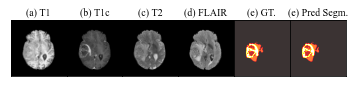

Patient name: BraTS20_Training_355
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([116, 116, 116, ..., 117, 117, 118], dtype=int64), array([ 99, 100, 101, ...,  94,  95,  94], dtype=int64))


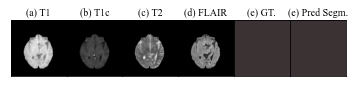

Patient name: BraTS20_Training_356
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([181, 181, 182, ..., 175, 175, 175], dtype=int64), array([81, 82, 79, ..., 66, 67, 68], dtype=int64))


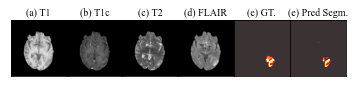

Patient name: BraTS20_Training_357
(array([ 64,  64,  64, ..., 114, 114, 114], dtype=int64), array([119, 119, 120, ..., 127, 128, 128], dtype=int64), array([87, 88, 83, ..., 87, 85, 87], dtype=int64))


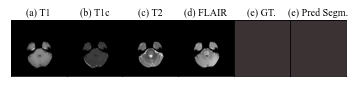

Patient name: BraTS20_Training_358
(array([ 56,  56,  56, ..., 113, 113, 113], dtype=int64), array([140, 140, 140, ..., 111, 112, 113], dtype=int64), array([64, 65, 66, ..., 63, 63, 63], dtype=int64))


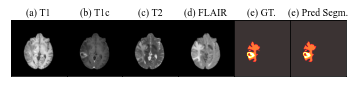

Patient name: BraTS20_Training_359
(array([ 56,  56,  56, ..., 106, 106, 147], dtype=int64), array([142, 142, 143, ..., 157, 157, 173], dtype=int64), array([93, 94, 92, ..., 90, 91, 69], dtype=int64))


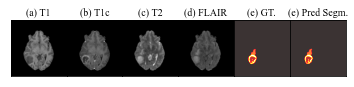

Patient name: BraTS20_Training_360
(array([ 61,  61,  61, ..., 123, 123, 123], dtype=int64), array([109, 109, 109, ..., 103, 104, 104], dtype=int64), array([101, 102, 103, ..., 107,  99, 100], dtype=int64))


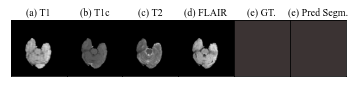

Patient name: BraTS20_Training_361
(array([116, 116, 116, ..., 168, 168, 168], dtype=int64), array([183, 183, 183, ..., 163, 163, 164], dtype=int64), array([ 98,  99, 100, ..., 112, 113, 112], dtype=int64))


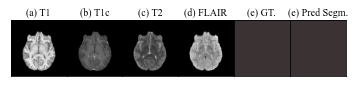

Patient name: BraTS20_Training_362
(array([119, 119, 119, ..., 182, 182, 182], dtype=int64), array([133, 134, 134, ..., 138, 138, 139], dtype=int64), array([68, 67, 68, ..., 57, 58, 57], dtype=int64))


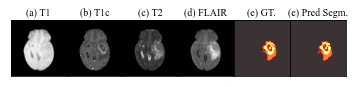

Patient name: BraTS20_Training_363
(array([122, 122, 122, ..., 184, 184, 184], dtype=int64), array([127, 127, 127, ..., 131, 131, 131], dtype=int64), array([95, 96, 97, ..., 66, 67, 68], dtype=int64))


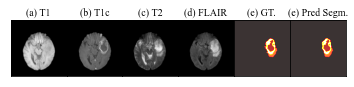

Patient name: BraTS20_Training_364
(array([ 53,  53,  53, ..., 104, 104, 104], dtype=int64), array([132, 132, 133, ..., 156, 157, 157], dtype=int64), array([53, 54, 52, ..., 90, 88, 89], dtype=int64))


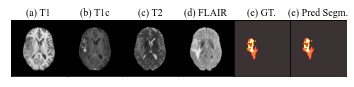

Patient name: BraTS20_Training_365
(array([ 56,  56,  56, ..., 123, 123, 123], dtype=int64), array([140, 140, 140, ..., 133, 133, 133], dtype=int64), array([87, 88, 89, ..., 81, 82, 83], dtype=int64))


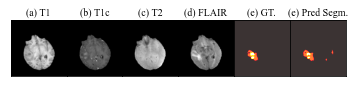

Patient name: BraTS20_Training_366
(array([122, 122, 122, ..., 168, 168, 168], dtype=int64), array([203, 203, 203, ..., 178, 178, 178], dtype=int64), array([92, 93, 94, ..., 86, 87, 88], dtype=int64))


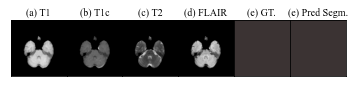

Patient name: BraTS20_Training_367
(array([ 47,  48,  48, ..., 150, 151, 151], dtype=int64), array([153, 146, 147, ..., 181, 181, 181], dtype=int64), array([69, 69, 68, ..., 73, 72, 73], dtype=int64))


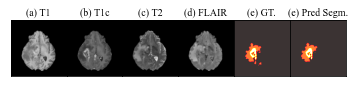

Patient name: BraTS20_Training_368
(array([124, 124, 124, ..., 180, 180, 180], dtype=int64), array([143, 143, 143, ..., 160, 160, 161], dtype=int64), array([85, 86, 87, ..., 77, 78, 75], dtype=int64))


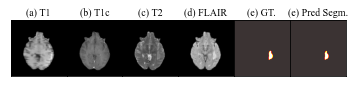

Patient name: BraTS20_Training_369
(array([ 66,  66,  66, ..., 182, 182, 183], dtype=int64), array([108, 109, 109, ..., 173, 173, 171], dtype=int64), array([103, 103, 104, ...,  81,  82,  80], dtype=int64))


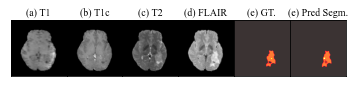

Patient name: name_mapping.csv


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/MICCAI_BraTS2020_TrainingData/name_mapping.csv/name_mapping.csv_t1.nii.gz'

In [58]:
model_folder = "20210309-133958_brats20_3d_pretrained_new_lr_1_lr_0.0001_epochs_60_TESTINGONTRAINING_60"

# seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20TrainingData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(training_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(training_data_path+ f'{patient_name}/' + f"{patient_name}_seg.nii.gz").get_fdata()
    predicted_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
    print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

#     subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) GT.', alpha=0.8)
    
    subimage(axs[5], predicted_seg[:,:,slice_nr], '(e) Pred Segm.', alpha=0.8)


    plt.show()
